<tr> 
    <td>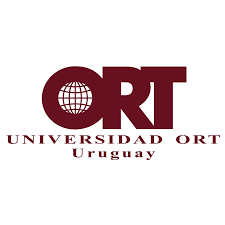</td>
        <td><td style="font-size:3vw"><font color='blue'><b>Análisis Exploratorio - Universidad ORT</b></font></td> 
</tr>

In [112]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
#import sweetviz as sv
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.options.display.max_columns= None


In [113]:
#!pip install sweetviz

In [114]:
df= pd.read_csv('base_v3.csv', delimiter= ';')

In [115]:
df

,Unnamed: 0,IdCliente,NPS,Categoria_nps,key,MF,MS,PBB,Q_activas,Cuentas,IBC,TdeC,CACC,Prestamos,Inversiones,Posición Consolidada 6 Meses,MontoTotalCompras_USD,CantidadTotalCompras_USD,MontoTotalComprasPromocion_USD,CantidadTotalComprasPromocion_USD,Key_y,Atencin,Baja mal procesada,Baja no procesada,Bono Bienvenida Volar,Bono por Consumo Volar,Call Center,Call Center Cobranzas,Campaas de descuentos,Canales Dig.: Apertura de cuen,Canales Dig.: Cartel errneo d,Canales Dig.: Consulta sobre m,Canales Dig.: Digitalizando ta,Canales Dig.: Error al transfe,Canales Dig.: Error en solicit,Canales Dig.: Error vista Itau,Canales Dig.: Errores al refin,Canales Dig.: Problemas al sol,Canales Dig.: Problemas con pa,Canales Dig.: Problemas con to,Canales Dig.: Problemas para v,Canales Dig: Problemas al acce,Canales Dig: Recepcin de avis,Cancelacin de cuenta,Cancelacin de tarjeta de dbi,Central de riesgos BCU,Cheques,Clearing de Informes,Cliente fallecido,Consulta sobre movimientos,Consultas varias,Contacto telefnico,Controversias de compra,Controversias de compra (TD),Convenios con tarjeta de dbit,Costo Estado de cuentas con en,Costo anual duplicado,Courier,Dbito no autorizado,Dbitos automticos,Depsitos errneos a cuentas I,Depsitos o retiros por buzn,Desbloqueo de tarjeta de crdi,Desconocimiento de gasto,Desconocimiento de gasto (TD),Devolucin de IMESI,Devolucin de costo anual por,Devolucin gastos,Devolucin intereses,Devolucin por tipo de cambio,Devolucin seguro de vida sobr,Dinero no dispensado,Envos entre agencias,Error/no recepcin de estado d,Factura electrnica,Fraude,Giros enviados (ST),Giros recibidos (OP),Inversiones,Ita Alimentacin,Lmite de Tarjeta de Crdito,Lmite de sobregiro,Lmite de transferencia Link,Millas LAN,Millas U25,Millas Volar,Millas Volar (TC),Millas Volar (TD),Nueva solicitud,Paganza,Pago mal acreditado,Pago no acreditado,Pago no ingresado,Pedido de informacin del exte,Priority Pass,Problema con Canje Volar,Programas de fidelizacin TC,Programas de fidelizacin TD,Reactivacin de tarjeta,Refinanciacin,Saldo a favor,Seguros,Solicitud pendiente,Transferencias errneas entre,Venta de Cartera,total_reclamos,mon_limite,limite,cant_adicionales,grupo_afinidad,Antiguedad Meses,Castigado,Clasificacion cliente,Edad maxima,Edad minima,Gestion,Linea Negocio,Moroso,Refinanciado,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1
0,0,8097901,10,Promotor,8097901_202207,1429.0,2667.0,4096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77863.615,"131,85553299011",10.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0,62389.0,1.0,Lanpass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,6.0,0.0,0.0,8.097901e+12
1,1,451943,10,Promotor,451943_202207,0.0,861.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0,88000.0,4.0,Volar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8176746,9,Promotor,8176746_202207,989.0,15.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15424.508,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0,0.0,0.0,Volar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Dada la cantidad de columnas referente a reclamos se decide analizar estas por separado

In [116]:
#Columnas reclamos
df_reclamos= df.iloc[:, 21: 106]

In [117]:
#Todos los clientes que no tuvieron ni siquiera un reclamo se pone  0
df_reclamos.fillna(0, inplace=True)

In [118]:
df_reclamos

,Atencin,Baja mal procesada,Baja no procesada,Bono Bienvenida Volar,Bono por Consumo Volar,Call Center,Call Center Cobranzas,Campaas de descuentos,Canales Dig.: Apertura de cuen,Canales Dig.: Cartel errneo d,Canales Dig.: Consulta sobre m,Canales Dig.: Digitalizando ta,Canales Dig.: Error al transfe,Canales Dig.: Error en solicit,Canales Dig.: Error vista Itau,Canales Dig.: Errores al refin,Canales Dig.: Problemas al sol,Canales Dig.: Problemas con pa,Canales Dig.: Problemas con to,Canales Dig.: Problemas para v,Canales Dig: Problemas al acce,Canales Dig: Recepcin de avis,Cancelacin de cuenta,Cancelacin de tarjeta de dbi,Central de riesgos BCU,Cheques,Clearing de Informes,Cliente fallecido,Consulta sobre movimientos,Consultas varias,Contacto telefnico,Controversias de compra,Controversias de compra (TD),Convenios con tarjeta de dbit,Costo Estado de cuentas con en,Costo anual duplicado,Courier,Dbito no autorizado,Dbitos automticos,Depsitos errneos a cuentas I,Depsitos o retiros por buzn,Desbloqueo de tarjeta de crdi,Desconocimiento de gasto,Desconocimiento de gasto (TD),Devolucin de IMESI,Devolucin de costo anual por,Devolucin gastos,Devolucin intereses,Devolucin por tipo de cambio,Devolucin seguro de vida sobr,Dinero no dispensado,Envos entre agencias,Error/no recepcin de estado d,Factura electrnica,Fraude,Giros enviados (ST),Giros recibidos (OP),Inversiones,Ita Alimentacin,Lmite de Tarjeta de Crdito,Lmite de sobregiro,Lmite de transferencia Link,Millas LAN,Millas U25,Millas Volar,Millas Volar (TC),Millas Volar (TD),Nueva solicitud,Paganza,Pago mal acreditado,Pago no acreditado,Pago no ingresado,Pedido de informacin del exte,Priority Pass,Problema con Canje Volar,Programas de fidelizacin TC,Programas de fidelizacin TD,Reactivacin de tarjeta,Refinanciacin,Saldo a favor,Seguros,Solicitud pendiente,Transferencias errneas entre,Venta de Cartera,total_reclamos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [119]:
print(df_reclamos.dtypes)

Atencin                           float64
Baja mal procesada                float64
Baja no procesada                 float64
Bono Bienvenida Volar             float64
Bono por Consumo Volar            float64
                                   ...   
Seguros                           float64
Solicitud pendiente               float64
Transferencias errneas entre      float64
Venta de Cartera                  float64
total_reclamos                    float64
Length: 85, dtype: object


In [120]:
df_reclamos.describe()

,Atencin,Baja mal procesada,Baja no procesada,Bono Bienvenida Volar,Bono por Consumo Volar,Call Center,Call Center Cobranzas,Campaas de descuentos,Canales Dig.: Apertura de cuen,Canales Dig.: Cartel errneo d,Canales Dig.: Consulta sobre m,Canales Dig.: Digitalizando ta,Canales Dig.: Error al transfe,Canales Dig.: Error en solicit,Canales Dig.: Error vista Itau,Canales Dig.: Errores al refin,Canales Dig.: Problemas al sol,Canales Dig.: Problemas con pa,Canales Dig.: Problemas con to,Canales Dig.: Problemas para v,Canales Dig: Problemas al acce,Canales Dig: Recepcin de avis,Cancelacin de cuenta,Cancelacin de tarjeta de dbi,Central de riesgos BCU,Cheques,Clearing de Informes,Cliente fallecido,Consulta sobre movimientos,Consultas varias,Contacto telefnico,Controversias de compra,Controversias de compra (TD),Convenios con tarjeta de dbit,Costo Estado de cuentas con en,Costo anual duplicado,Courier,Dbito no autorizado,Dbitos automticos,Depsitos errneos a cuentas I,Depsitos o retiros por buzn,Desbloqueo de tarjeta de crdi,Desconocimiento de gasto,Desconocimiento de gasto (TD),Devolucin de IMESI,Devolucin de costo anual por,Devolucin gastos,Devolucin intereses,Devolucin por tipo de cambio,Devolucin seguro de vida sobr,Dinero no dispensado,Envos entre agencias,Error/no recepcin de estado d,Factura electrnica,Fraude,Giros enviados (ST),Giros recibidos (OP),Inversiones,Ita Alimentacin,Lmite de Tarjeta de Crdito,Lmite de sobregiro,Lmite de transferencia Link,Millas LAN,Millas U25,Millas Volar,Millas Volar (TC),Millas Volar (TD),Nueva solicitud,Paganza,Pago mal acreditado,Pago no acreditado,Pago no ingresado,Pedido de informacin del exte,Priority Pass,Problema con Canje Volar,Programas de fidelizacin TC,Programas de fidelizacin TD,Reactivacin de tarjeta,Refinanciacin,Saldo a favor,Seguros,Solicitud pendiente,Transferencias errneas entre,Venta de Cartera,total_reclamos
count,11662.000000,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.0,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.000000,11662.000000,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.000000,11662.000000,11662.0,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.0,11662.000000,11662.000000,11662.000000,11662.000000,11662.0,11662.0,11662.000000,11662.0,11662.000000,11662.0,11662.000000,11662.0,11662.0,11662.0,11662.000000,11662.000000,11662.0,11662.0,11662.0,11662.0,11662.0,11662.0,11662.0,11662.0,11662.0,11662.000000,11662.000000,11662.0,11662.0,11662.0,11662.0,11662.0,11662.000000,11662.000000,11662.0,11662.000000,11662.0,11662.0,11662.0,11662.000000,11662.0,11662.000000,11662.0,11662.0,11662.000000
mean,0.000171,0.0,0.0,0.0,0.000086,0.0,0.0,0.000429,0.0,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.000171,0.000086,0.0,0.0,0.0,0.000171,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.003773,0.002058,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.000171,0.000086,0.000171,0.000086,0.0,0.0,0.000086,0.0,0.000086,0.0,0.000686,0.0,0.0,0.0,0.000086,0.000943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000171,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.000086,0.0,0.000086,0.0,0.0,0.0,0.001029,0.0,0.002144,0.0,0.0,0.013120
std,0.013095,0.0,0.0,0.0,0.009260,0.0,0.0,0.020703,0.0,0.0,0.0,0.0,0.0,0.0,0.009260,0.0,0.0,0.013095,0.009260,0.0,0.0,0.0,0.018520,0.0,0.0,0.0,0.0,0.0,0.009260,0.0,0.0,0.070424,0.048958,0.0,0.0,0.0,0.0,0.009260,0.0,0.0,0.013095,0.009260,0.013095,0.009260,0.0,0.0,0.009260,0.0,0.009260,0.0,0.048997,0.0,0.0,0.0,0.009260,0.040354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013095,0.009260,0.0,0.0,0.0,0.0,0.0,0.009260,0.009260,0.0,0.009260,0.0,0.0,0.0,0.039275,0.0,0.064788,0.0,0.0,0.165395
min,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000

In [121]:
float_cols= df_reclamos.select_dtypes(include=['float64']).columns.tolist()
len(float_cols)

85

Distribución de variables numericas

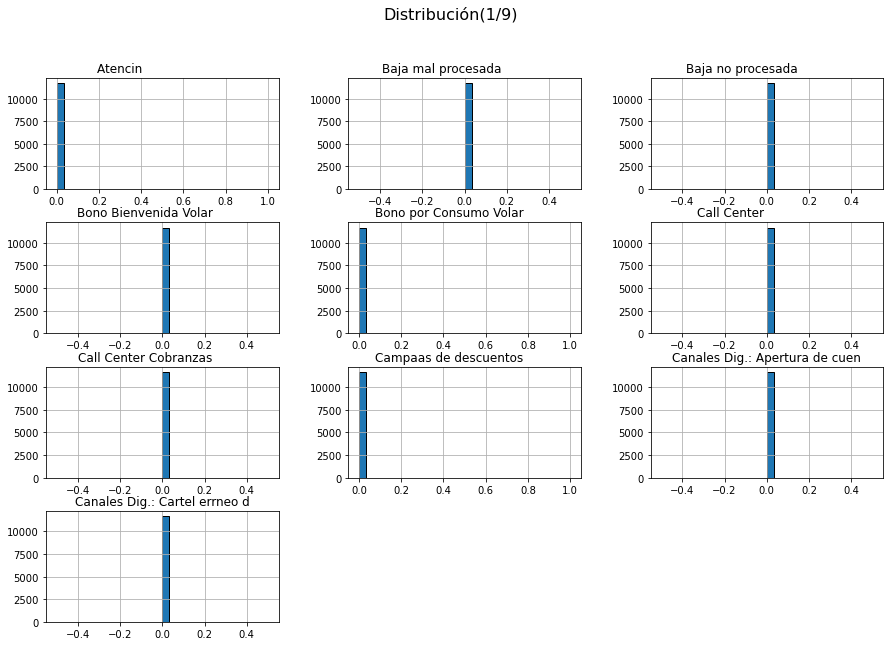

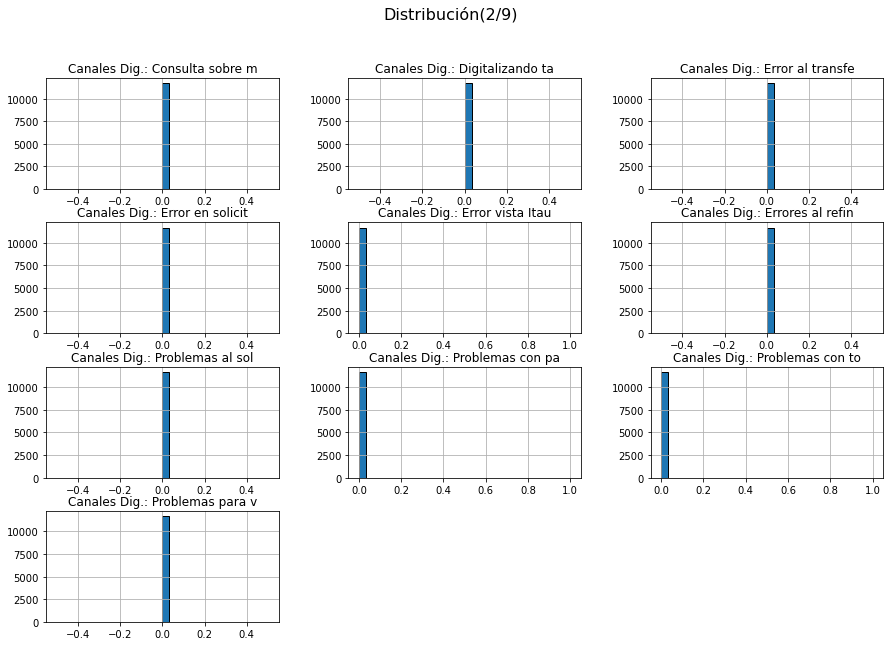

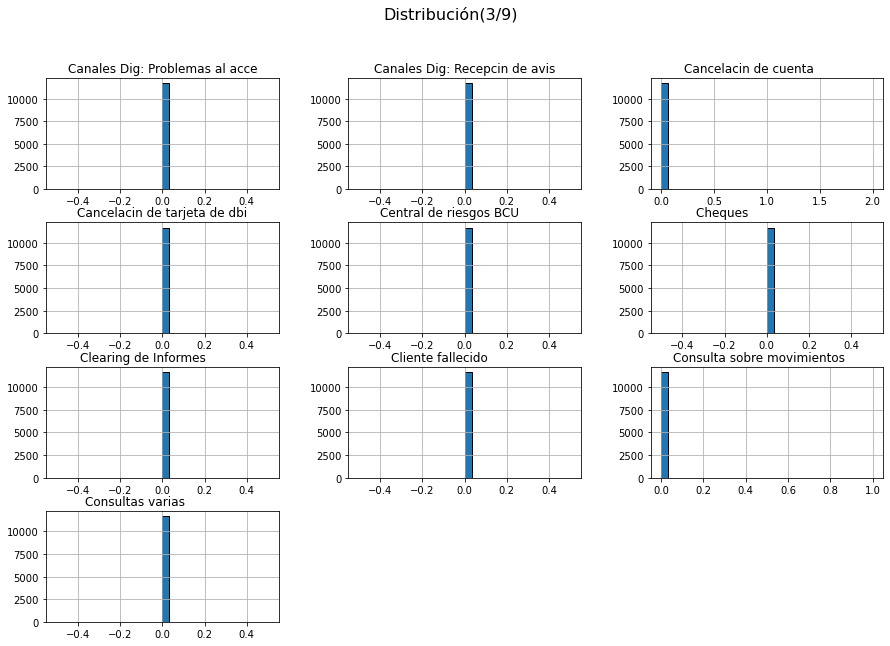

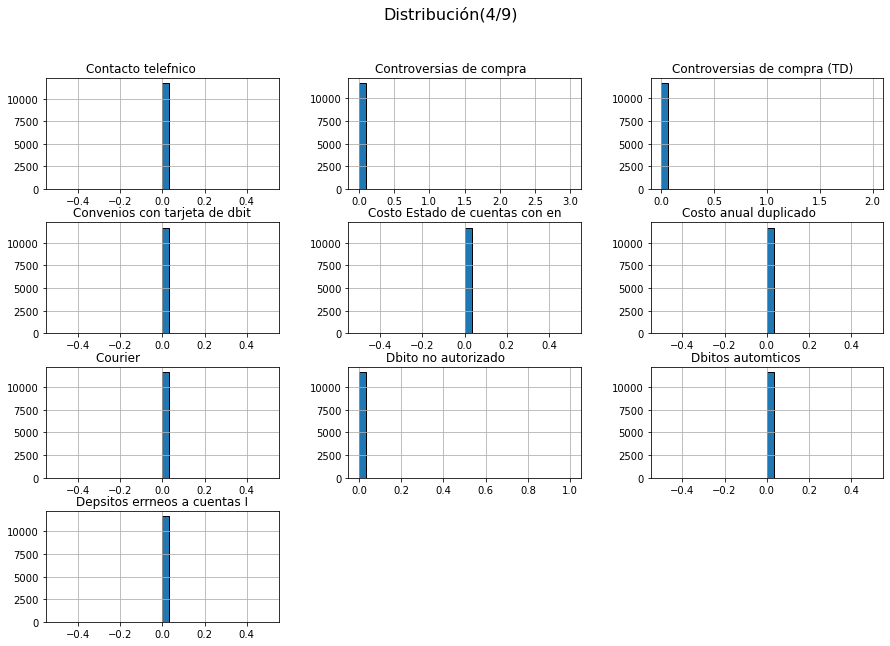

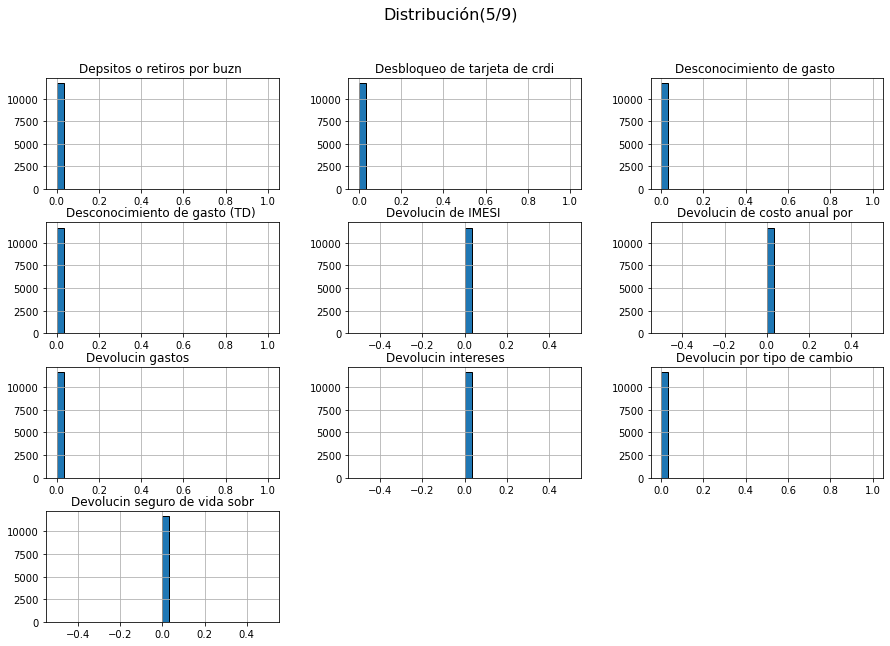

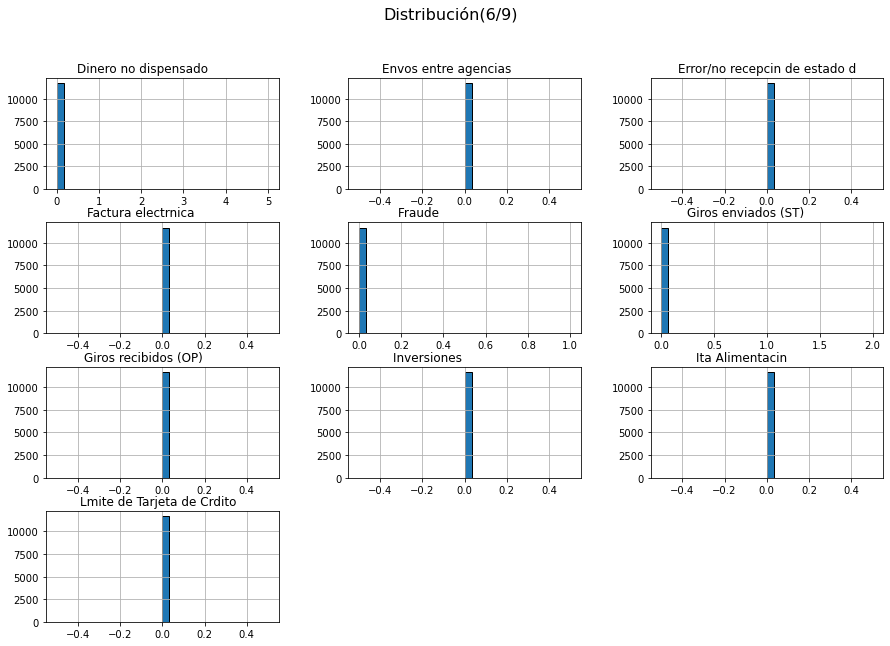

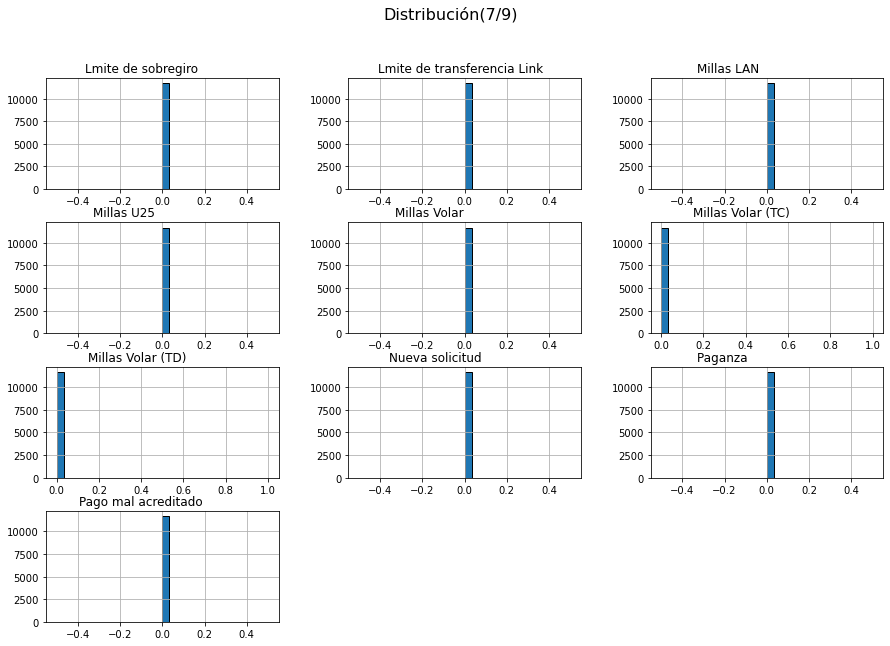

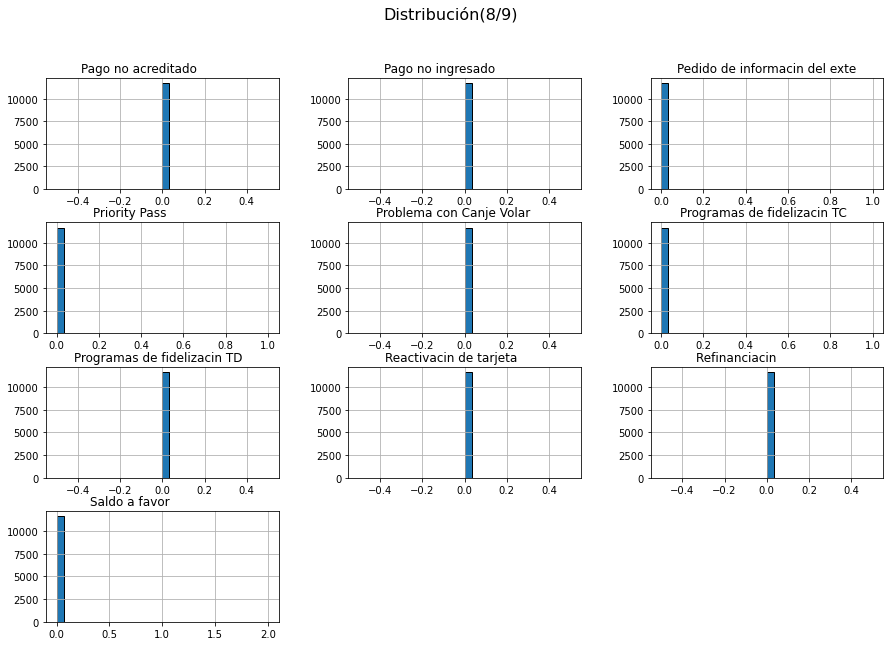

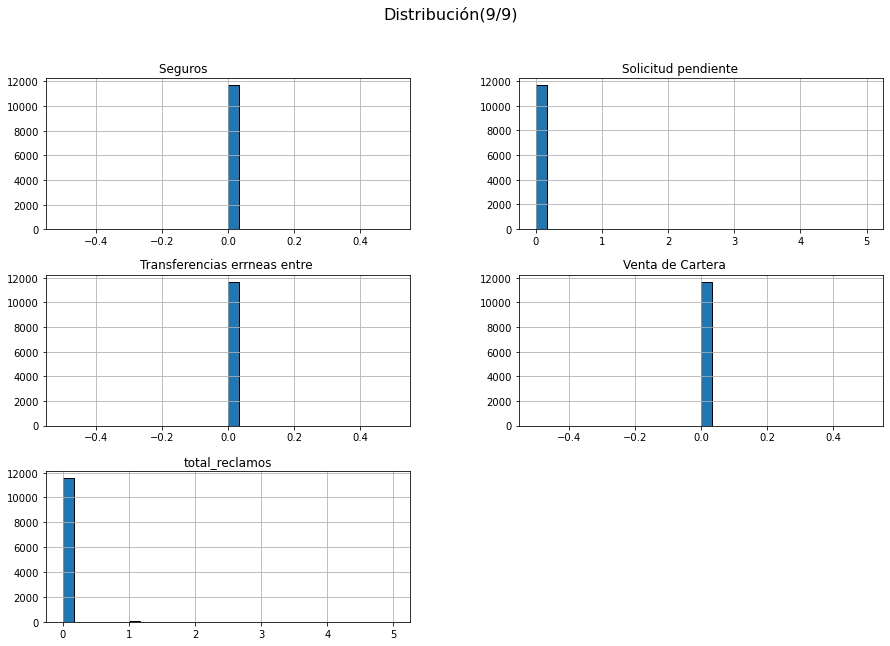

In [122]:
num_vars = len(float_cols)
vars_per_plot = 10  # Número de variables por gráfico
num_plots = int(np.ceil(num_vars / vars_per_plot))  # Cantidad de gráficos necesarios

for i in range(num_plots):
    subset = float_cols[i * vars_per_plot:(i + 1) * vars_per_plot]  # Tomar 20 variables por grupo
    df_reclamos[subset].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.suptitle(f"Distribución({i+1}/{num_plots})", fontsize=16)
    plt.show()


Reclamos nunca ingresados:

Muchas columnas tiene un minimo, percentil 25%, mediana y percentil 75% igual a 0, lo que indica que casi ningun cliente tiene reclamos en esas categorias. Se procede a eliminar las variables que solo tienen 0.

In [123]:
#Cantidad de columnas a eliminar (Reclamos que nunca fueron ingresados)
col_eliminar= df_reclamos.columns[(df_reclamos==0).all()]
len(col_eliminar)

57

In [124]:
col_eliminar

Index(['Baja mal procesada            ', 'Baja no procesada             ',
       'Bono Bienvenida Volar         ', 'Call Center                   ',
       'Call Center Cobranzas         ', 'Canales Dig.: Apertura de cuen',
       'Canales Dig.: Cartel errneo d', 'Canales Dig.: Consulta sobre m',
       'Canales Dig.: Digitalizando ta', 'Canales Dig.: Error al transfe',
       'Canales Dig.: Error en solicit', 'Canales Dig.: Errores al refin',
       'Canales Dig.: Problemas al sol', 'Canales Dig.: Problemas para v',
       'Canales Dig: Problemas al acce', 'Canales Dig: Recepcin de avis',
       'Cancelacin de tarjeta de dbi', 'Central de riesgos BCU        ',
       'Cheques                       ', 'Clearing de Informes          ',
       'Cliente fallecido             ', 'Consultas varias              ',
       'Contacto telefnico           ', 'Convenios con tarjeta de dbit',
       'Costo Estado de cuentas con en', 'Costo anual duplicado         ',
       'Courier                

In [125]:
#Se eliminan 57 columnas
df_reclamos.drop(columns=col_eliminar, inplace=True)

Cantidad de registros con reclamos ingresados

In [126]:
df_con_recl= df_reclamos[df_reclamos['total_reclamos']> 0]
len(df_con_recl)

101

In [127]:
df_con_recl.describe()

,Atencin,Bono por Consumo Volar,Campaas de descuentos,Canales Dig.: Error vista Itau,Canales Dig.: Problemas con pa,Canales Dig.: Problemas con to,Cancelacin de cuenta,Consulta sobre movimientos,Controversias de compra,Controversias de compra (TD),Dbito no autorizado,Depsitos o retiros por buzn,Desbloqueo de tarjeta de crdi,Desconocimiento de gasto,Desconocimiento de gasto (TD),Devolucin gastos,Devolucin por tipo de cambio,Dinero no dispensado,Fraude,Giros enviados (ST),Millas Volar (TC),Millas Volar (TD),Pedido de informacin del exte,Priority Pass,Programas de fidelizacin TC,Saldo a favor,Solicitud pendiente,total_reclamos
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.009901,0.009901,0.049505,0.009901,0.019802,0.009901,0.019802,0.009901,0.435644,0.237624,0.009901,0.019802,0.009901,0.019802,0.009901,0.009901,0.009901,0.079208,0.009901,0.108911,0.019802,0.009901,0.009901,0.009901,0.009901,0.118812,0.247525,1.514851
std,0.099504,0.099504,0.218002,0.099504,0.140014,0.099504,0.199007,0.099504,0.623151,0.472197,0.099504,0.140014,0.099504,0.140014,0.099504,0.099504,0.099504,0.523128,0.099504,0.421924,0.140014,0.099504,0.099504,0.099504,0.099504,0.407115,0.654308,0.944604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000


# Base inicial sin reclamos

In [128]:
#Se elimina de la base inicial todas las columnas que corresponden a tipo de reclamos
cols_reclamos= df.iloc[:, 21: 106]
eliminar= cols_reclamos.columns
df= df.drop(columns=eliminar)

In [129]:
print(df.dtypes)

Unnamed: 0                             int64
IdCliente                              int64
NPS                                    int64
Categoria_nps                         object
key                                   object
MF                                   float64
MS                                   float64
PBB                                  float64
Q_activas                            float64
Cuentas                              float64
IBC                                  float64
TdeC                                 float64
CACC                                 float64
Prestamos                            float64
Inversiones                          float64
Posición Consolidada 6 Meses         float64
MontoTotalCompras_USD                 object
CantidadTotalCompras_USD             float64
MontoTotalComprasPromocion_USD        object
CantidadTotalComprasPromocion_USD    float64
Key_y                                 object
mon_limite                           float64
limite    

Se cambian algunas variables a tipo de datos categoricas con el fin de analizarlas en el EDA

In [130]:
#Se convierten variables  a tipo de dato bool para poder analizar y posteriormente modelar
#Agregar dsp la de productos
cols_binarias= ['Castigado', 'Gestion', 'Moroso', 'Refinanciado', 'Cuentas', 'IBC', 'TdeC', 'CACC',  'Prestamos', 'Inversiones']

for col in cols_binarias:
    df[col]= df[col].map({1:'Si', 0: 'No'})
    df[col]= df[col].fillna('Desconocido').astype('category')
    

In [131]:
df.describe()

,Unnamed: 0,IdCliente,NPS,MF,MS,PBB,Q_activas,Posición Consolidada 6 Meses,CantidadTotalCompras_USD,CantidadTotalComprasPromocion_USD,mon_limite,limite,cant_adicionales,Antiguedad Meses,Edad maxima,Edad minima,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1
count,11662.000000,1.166200e+04,11662.000000,1.166200e+04,11662.000000,1.166200e+04,7879.000000,1.166200e+04,5152.000000,11662.000000,7627.000000,7.627000e+03,7627.000000,8520.000000,7945.000000,7945.000000,8069.000000,9802.000000,9802.000000,9802.000000,9802.000000,9802.000000,1.006000e+04
mean,5830.500000,5.054424e+06,8.387069,5.852363e+03,3554.702367,9.387009e+03,1.925244,2.723658e+06,26.835404,160.109758,857.681395,1.937002e+05,1.336436,123.833568,43.443298,39.304720,0.953278,10.833197,19.444603,1.801877,0.026015,0.002346,5.039140e+12
std,3366.673754,2.801066e+06,2.474998,2.709760e+04,9637.311842,3.091350e+04,0.836385,1.856237e+07,27.626128,200.535913,2.373630,1.929442e+05,1.832434,99.674717,26.015572,27.086341,0.211056,18.406647,26.716563,5.352709,0.257995,0.080140,2.816646e+12
min,0.000000,5.630000e+02,0.000000,-4.638000e+04,-16641.000000,-4.638000e+04,0.000000,0.000000e+00,1.000000,100.000000,840.000000,0.000000e+00,0.000000,0.000000,-46.000000,-46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.632022e+08
25%,2915.250000,3.334662e+06,8.000000,1.000000e+02,100.000000,1.000000e+02,1.000000,1.714361e+03,9.000000,100.000000,858.000000,5.375000e+04,0.000000,35.000000,32.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.283159e+12
50%,5830.500000,4.958740e+06,10.000000,2.230000e+02,1218.000000,2.256000e+03,2.000000,4.728701e+04,18.000000,100.000000,858.000000,1.440000e+05,1.000000,109.000000,46.000000,43.000000,1.000000,4.000000,11.000000,0.000000,0.000000,0.000000,4.923577e+12
75%,8745.750000,7.351800e+06,10.000000,3.286750e+03,3999.250000,8.121750e+03,2.000000,6.771829e+05,35.000000,100.000000,858.000000,2.718855e+05,2.000000,186.000000,59.000000,55.000000,1.000000,14.000000,28.000000,1.000000,0.000000,0.000000,7.359215e+12
max,11661.000000,9.998947e+06,10.000000,2.024348e+06,384794.000000,2.071718e+06,12.000000,1.261218e+09,326.000000,5400.000000,858.000000,2.673982e+06,16.000000,509.000000,124.000000,124.000000,1.000000,364.000000,438.000000,80.000000,11.000000,5.000000,9.998947e+12


In [132]:
#reporte_jime= sv.analyze(df, target_feat= 'IdCliente')
#reporte_jime.show_html()

# Tratamiento variables financieras (MS, MF y PBB)

In [133]:
#Cantidad de valores negativos
negativos_MF= (df['MF']< 0).sum()
print(f'Cantidad de valores negativos MF: {negativos_MF}')

#Cantidad de valores negativos
negativos_MS= (df['MS']< 0).sum()
print(f'Cantidad de valores negativos MS: {negativos_MS}')

#Cantidad de valores negativos
negativos_PBB= (df['PBB']< 0).sum()
print(f'Cantidad de valores negativos PBB: {negativos_PBB}')

Cantidad de valores negativos MF: 26
Cantidad de valores negativos MS: 70
Cantidad de valores negativos PBB: 61


In [134]:
#Cantidad de valores en 0
ceros_MF= (df['MF']== 0).sum()
print(f'Cantidad de valores en 0 MF: {ceros_MF}')

#Cantidad de valores en 0
ceros_MS= (df['MS']== 0).sum()
print(f'Cantidad de valores en 0 MS: {ceros_MS}')

#Cantidad de valores en 0
ceros_PBB= (df['PBB']== 0).sum()
print(f'Cantidad de valores en 0 PBB: {ceros_PBB}')

Cantidad de valores en 0 MF: 1356
Cantidad de valores en 0 MS: 468
Cantidad de valores en 0 PBB: 23


In [135]:
#Cantidad de valores nulos

nulls_MF= df['MF'].isnull().sum()
print(f'Cantidad de valores nulos MF: {nulls_MF}')

#Cantidad de valores en 0
nulls_MS= df['MS'].isnull().sum()
print(f'Cantidad de valores nulos MS: {nulls_MS}')

#Cantidad de valores en 0
nulls_PBB= df['PBB'].isnull().sum()
print(f'Cantidad de valores nulos PBB: {nulls_PBB}')

Cantidad de valores nulos MF: 0
Cantidad de valores nulos MS: 0
Cantidad de valores nulos PBB: 0


In [136]:
#a lo valores nulos se sustitye por la mediana
df['MF']= df['MF'].fillna(df['MF'].median())
df['MS']= df['MS'].fillna(df['MS'].median())
df['PBB']= df['PBB'].fillna(df['PBB'].median())

<function matplotlib.pyplot.show(close=None, block=None)>

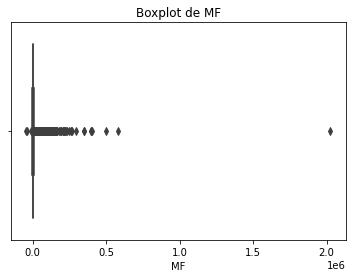

In [137]:
sns.boxplot(x=df['MF'])
plt.title('Boxplot de MF')
plt.xlabel('MF')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

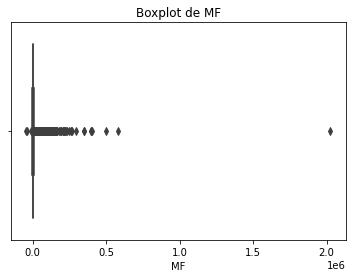

In [138]:
sns.boxplot(x=df['MF'])
plt.title('Boxplot de MF')
plt.xlabel('MF')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

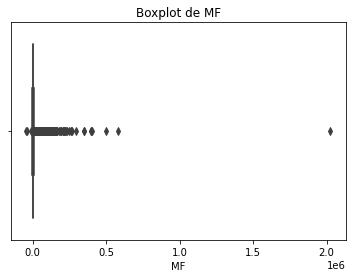

In [139]:
sns.boxplot(x=df['MF'])
plt.title('Boxplot de MF')
plt.xlabel('MF')
plt.show

In [140]:
#Para normalizar los valores
#scaler=RobustScaler()
#df['MF']= scaler.fit_transform(df[['MF']])
#df['MS']= scaler.fit_transform(df[['MS']])
#df['PBB']= scaler.fit_transform(df[['PBB']])

# Tratamiento uso canales digitales

In [141]:
#Cantidad de valores nulos

nulls_IL= df['Q_login_IL'].isnull().sum()
print(f'Cantidad de valores nulos Q_login_IL: {nulls_IL}')


nulls_SA= df['Q_login_SA'].isnull().sum()
print(f'Cantidad de valores nulos Q_login_SA: {nulls_SA}')


nulls_PG= df['Q_login_PG'].isnull().sum()
print(f'Cantidad de valores nulos Q_login_PG: {nulls_PG}')


nulls_WA= df['Q_login_WA'].isnull().sum()
print(f'Cantidad de valores nulos Q_login_PG: {nulls_WA}')

nulls_TV= df['Q_login_TV'].isnull().sum()
print(f'Cantidad de valores nulos Q_login_TV: {nulls_TV}')

Cantidad de valores nulos Q_login_IL: 1860
Cantidad de valores nulos Q_login_SA: 1860
Cantidad de valores nulos Q_login_PG: 1860
Cantidad de valores nulos Q_login_PG: 1860
Cantidad de valores nulos Q_login_TV: 1860


In [142]:
#Se imputa la mediana a los valores faltantes
for col in ['Q_login_IL', 'Q_login_SA', 'Q_login_PG', 'Q_login_WA', 'Q_login_TV']:
    df[col]= df[col].fillna(df[col].median())

In [143]:
#Para normalizar los valores
#scaler=RobustScaler()
#df['Q_login_IL']= scaler.fit_transform(df[['Q_login_IL']])
#df['Q_login_SA']= scaler.fit_transform(df[['Q_login_SA']])
#df['Q_login_PG']= scaler.fit_transform(df[['Q_login_PG']])
#df['Q_login_WA']= scaler.fit_transform(df[['Q_login_WA']])
#df['Q_login_TV']= scaler.fit_transform(df[['Q_login_TV']])

# Indicadores de riesgo crediticio

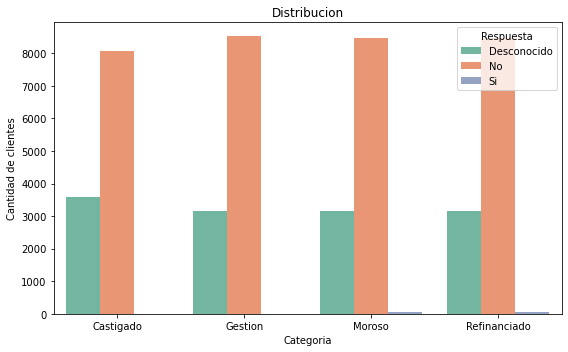

In [144]:
Variables_riesgo= ['Castigado', 'Gestion', 'Moroso', 'Refinanciado']

df_grafica= df[Variables_riesgo].melt(var_name='Variable', value_name='Respuesta')

conteo=df_grafica.groupby(['Variable', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize= (8,5))
sns.barplot(data=conteo, x='Variable', y='Cantidad', hue='Respuesta', palette='Set2')


plt.title(f'Distribucion')

plt.xlabel('Categoria')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Respuesta')

plt.tight_layout()
plt.show()


In [145]:
del df['Castigado']
del df['Gestion']
del df['Moroso']
del df['Refinanciado']

# Utilización de TC

In [146]:
df[['MontoTotalCompras_USD','CantidadTotalCompras_USD','MontoTotalComprasPromocion_USD','CantidadTotalComprasPromocion_USD','mon_limite','limite','cant_adicionales','grupo_afinidad']].dtypes

MontoTotalCompras_USD                 object
CantidadTotalCompras_USD             float64
MontoTotalComprasPromocion_USD        object
CantidadTotalComprasPromocion_USD    float64
mon_limite                           float64
limite                               float64
cant_adicionales                     float64
grupo_afinidad                        object
dtype: object

In [147]:
df[['MontoTotalCompras_USD','CantidadTotalCompras_USD','MontoTotalComprasPromocion_USD','CantidadTotalComprasPromocion_USD','mon_limite','limite','cant_adicionales','grupo_afinidad']].describe()

,CantidadTotalCompras_USD,CantidadTotalComprasPromocion_USD,mon_limite,limite,cant_adicionales
count,5152.000000,11662.000000,7627.000000,7.627000e+03,7627.000000
mean,26.835404,160.109758,857.681395,1.937002e+05,1.336436
std,27.626128,200.535913,2.373630,1.929442e+05,1.832434
min,1.000000,100.000000,840.000000,0.000000e+00,0.000000
25%,9.000000,100.000000,858.000000,5.375000e+04,0.000000
50%,18.000000,100.000000,858.000000,1.440000e+05,1.000000
75%,35.000000,100.000000,858.000000,2.718855e+05,2.000000
max,326.000000,5400.000000,858.000000,2.673982e+06,16.000000


In [148]:
df['MontoTotalComprasPromocion_USD']=df['MontoTotalComprasPromocion_USD'].str.replace(',','.').astype('float')
df['MontoTotalCompras_USD']=df['MontoTotalCompras_USD'].str.replace(',','.').astype('float')

In [149]:
df['cant_adicionales']=df['cant_adicionales'].fillna(0).astype('int')
df['CantidadTotalCompras_USD']=df['CantidadTotalCompras_USD'].fillna(0).astype('int')
df['CantidadTotalComprasPromocion_USD']=df['CantidadTotalComprasPromocion_USD'].fillna(0).astype('int')
df['MontoTotalComprasPromocion_USD']=df['MontoTotalComprasPromocion_USD'].fillna(0).astype('int')
df['MontoTotalCompras_USD']=df['MontoTotalCompras_USD'].fillna(0).astype('int')

In [150]:
df.mon_limite.value_counts()

858.0    7492
840.0     135
Name: mon_limite, dtype: int64

In [151]:
df.grupo_afinidad

0        Lanpass
1          Volar
2          Volar
3          Volar
4          Volar
          ...   
11657      Volar
11658      Volar
11659      Volar
11660        NaN
11661    Lanpass
Name: grupo_afinidad, Length: 11662, dtype: object

In [152]:
def fillna_probabilistico(df, columna, probabilidades):
    if sum(probabilidades.values()) != 100:
        raise ValueError("Las probabilidades deben sumar 100%")
    opciones = list(probabilidades.keys())
    pesos = [p/100 for p in probabilidades.values()]
    nan_count = df[columna].isna().sum()
    valores_aleatorios = np.random.choice(opciones, size=nan_count, p=pesos)
    df.loc[df[columna].isna(), columna] = valores_aleatorios
    return df
probabilidades_afinidad = {'volar': 60, 'Lanpass': 30, 'Personal Bank': 10}

Por datos faltantes se completa grupo de afinidad en base a distribuciuon de grupo de afinidad por probabilidad en base a base total del banco

In [153]:
df=fillna_probabilistico(df, 'grupo_afinidad', probabilidades_afinidad)

In [154]:
df['afinidad']=np.where(df['grupo_afinidad'].str.contains('Volar'),'VOLAR',np.where(df['grupo_afinidad'].str.contains('Lanpass'),'LAN',np.where(df['grupo_afinidad'].str.contains('Personal'),'PB','OTROS')))

In [155]:
df['afinidad'].value_counts()

VOLAR    5945
LAN      2845
OTROS    2400
PB        472
Name: afinidad, dtype: int64

In [156]:
df['afinidad']=df['afinidad'].astype('category')

In [157]:
#Hacemos one hot encoding para el grupo de afinidad

Variable_one_hot= ['afinidad']
df= pd.get_dummies(df, columns= Variable_one_hot, drop_first= False)
df

,Unnamed: 0,IdCliente,NPS,Categoria_nps,key,MF,MS,PBB,Q_activas,Cuentas,IBC,TdeC,CACC,Prestamos,Inversiones,Posición Consolidada 6 Meses,MontoTotalCompras_USD,CantidadTotalCompras_USD,MontoTotalComprasPromocion_USD,CantidadTotalComprasPromocion_USD,Key_y,mon_limite,limite,cant_adicionales,grupo_afinidad,Antiguedad Meses,Clasificacion cliente,Edad maxima,Edad minima,Linea Negocio,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1,afinidad_LAN,afinidad_OTROS,afinidad_PB,afinidad_VOLAR
0,0,8097901,10,Promotor,8097901_202207,1429.0,2667.0,4096.0,NaN,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,77863.615,131,10,0,100,NaN,858.0,62389.0,1,Lanpass,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,6.0,0.0,0.0,8.097901e+12,1,0,0,0
1,1,451943,10,Promotor,451943_202207,0.0,861.0,861.0,NaN,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,100.000,0,0,0,100,NaN,858.0,88000.0,4,Volar,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.0,0.0,0.0,0.0,NaN,0,0,0,1
2,2,8176746,9,Promotor,8176746_202207,989.0,15.0,1004.0,NaN,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,15424.508,0,0,0,100,NaN,858.0,0.0,0,Volar,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0.0,0.0,0.0,0.0,8.176746e+12,0,0,0,1
3,3,733821,7,Neutro,733821_202207,0.0,4361.0,4361.0,NaN,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,100.000,0,0,0,100,NaN,858.0,234000.0,1,Volar,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.0,0.0,0.0,7.338212e+11,0,0,0,1
4,4,578720,10,Promotor,578720_202207,0.0,5269.0,5269.0,NaN,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,100.000,0,0,0,100,NaN,858.0,120000.0,0,Volar,NaN,NaN,NaN,NaN,NaN,NaN,0.0,27.0,0.0,0.0,0.0,5.787202e+11,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,11657,487915,10,Promotor,487915_202412,100.0,100.0,100.0,2.0,Si,Si,Si,No,No,No,224971.550,0,0,0,100,NaN,858.0,78750.0,0,Volar,59.0,Pocket,38.0,38.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,4.879152e+11,0,0,0,1
11658,11658,5823903,10,Promotor,5823903_202412,30.0,616.0,646.0,1.0,Si,Si,Si,No,No,No,7306.165,0,0,0,100,NaN,858.0,34000.0,0,Volar,5.0,Pas,33.0,33.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,5.823903e+12,0,0,0,1
11659,11659,5690603,8,Neutro,5690603_202412,1289.0,7141.0,8430.0,2.0,Si,Si,Si,No,No,No,151048.040,0,0,0,100,NaN,858.0,236000.0,0,Volar,171.0,Full,46.0,46.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,5.690603e+12,0,0,0,1
11660,11660,5276148,10,Promotor,5276148_202412,146.0,3.0,149.0,2.0,Si,Si,No,No,No,No,48428.677,0,0,0,100,NaN,NaN,NaN,0,Personal Bank,16.0,Pocket,43.0,43.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,1,0


In [158]:
del df['grupo_afinidad']

In [159]:
df['Limite_unificado']=np.where(df['mon_limite']==858.0, df['limite']/40,df['limite']) 
del df['mon_limite']
del df['limite']

In [160]:
df['Limite_unificado']

0        1559.725
1        2200.000
2           0.000
3        5850.000
4        3000.000
           ...   
11657    1968.750
11658     850.000
11659    5900.000
11660         NaN
11661    4700.000
Name: Limite_unificado, Length: 11662, dtype: float64

In [161]:
# completamos valores faltantes con su media
df['Limite_unificado']= df['Limite_unificado'].fillna(df['Limite_unificado'].median())
df['Limite_unificado'].describe()

count    11662.000000
mean      4568.740598
std       4034.544180
min          0.000000
25%       2520.000000
50%       3750.000000
75%       5068.750000
max      66849.550000
Name: Limite_unificado, dtype: float64

In [162]:
df['l_posicion']=np.log2(df['Posición Consolidada 6 Meses']+1)
del df['Posición Consolidada 6 Meses']

(array([1.200e+01, 6.000e+00, 1.000e+01, 1.000e+01, 1.700e+01, 3.900e+01,
        2.361e+03, 8.400e+01, 8.300e+01, 1.600e+02, 2.120e+02, 3.530e+02,
        6.030e+02, 7.380e+02, 8.350e+02, 7.500e+02, 7.940e+02, 7.400e+02,
        7.660e+02, 7.150e+02, 6.580e+02, 5.400e+02, 4.640e+02, 3.640e+02,
        2.060e+02, 9.000e+01, 3.700e+01, 1.000e+01, 4.000e+00, 1.000e+00]),
 array([ 0.        ,  1.00773902,  2.01547804,  3.02321706,  4.03095608,
         5.03869511,  6.04643413,  7.05417315,  8.06191217,  9.06965119,
        10.07739021, 11.08512923, 12.09286825, 13.10060728, 14.1083463 ,
        15.11608532, 16.12382434, 17.13156336, 18.13930238, 19.1470414 ,
        20.15478042, 21.16251944, 22.17025847, 23.17799749, 24.18573651,
        25.19347553, 26.20121455, 27.20895357, 28.21669259, 29.22443161,
        30.23217063]),
 <BarContainer object of 30 artists>)

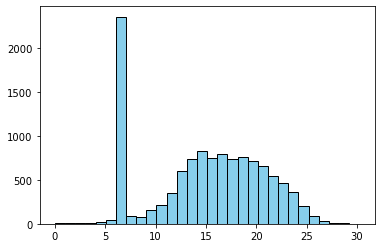

In [163]:
plt.hist(df['l_posicion'], bins=30, color='skyblue', edgecolor='black')

# Antiguedad meses_Edad minima y edad maxima_Residente

In [164]:
df[['Edad minima','Edad maxima','Antiguedad Meses', 'Residente']].dtypes

Edad minima         float64
Edad maxima         float64
Antiguedad Meses    float64
Residente           float64
dtype: object

In [165]:
#Edad minima
negativos_Edad_minima= (df['Edad minima']< 0).sum()
print(f'Cantidad de valores negativos Edad minima: {negativos_Edad_minima}')

nulls_Edad_minima= df['Edad minima'].isnull().sum()
print(f'Cantidad de valores nulos Edad minima: {nulls_Edad_minima}')

Cantidad de valores negativos Edad minima: 656
Cantidad de valores nulos Edad minima: 3717


In [166]:
#Se imputa los valores nulos y los valores negativos con la mediana 
mediana_Edad_minima= df.loc[df['Edad minima'] >= 0, 'Edad minima'].median()

df.loc[df['Edad minima']< 0, 'Edad minima']= mediana_Edad_minima

df['Edad minima']= df['Edad minima'].fillna(mediana_Edad_minima)

(array([2.00e+00, 0.00e+00, 8.00e+00, 3.65e+02, 4.47e+02, 5.11e+02,
        5.79e+02, 6.14e+02, 6.24e+02, 4.90e+03, 7.35e+02, 7.53e+02,
        4.91e+02, 4.43e+02, 4.26e+02, 3.32e+02, 1.72e+02, 1.10e+02,
        5.40e+01, 1.70e+01, 1.10e+01, 2.00e+00, 2.00e+00, 2.00e+00,
        2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 6.00e+00, 5.20e+01]),
 array([  7. ,  10.9,  14.8,  18.7,  22.6,  26.5,  30.4,  34.3,  38.2,
         42.1,  46. ,  49.9,  53.8,  57.7,  61.6,  65.5,  69.4,  73.3,
         77.2,  81.1,  85. ,  88.9,  92.8,  96.7, 100.6, 104.5, 108.4,
        112.3, 116.2, 120.1, 124. ]),
 <BarContainer object of 30 artists>)

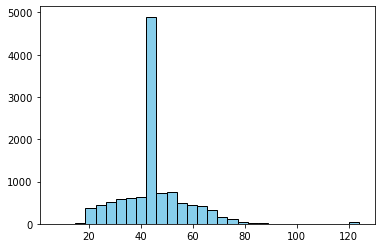

In [167]:
plt.hist(df['Edad minima'], bins=30, color='skyblue', edgecolor='black')

In [168]:
#Edad máxima
negativos_Edad_maxima= (df['Edad maxima']< 0).sum()
print(f'Cantidad de valores negativos Edad maxima: {negativos_Edad_maxima}')

nulls_Edad_maxima= df['Edad maxima'].isnull().sum()
print(f'Cantidad de valores nulos Edad_maxima: {nulls_Edad_maxima}')

Cantidad de valores negativos Edad maxima: 470
Cantidad de valores nulos Edad_maxima: 3717


In [169]:
#Se imputa los valores nulos y los valores negativos con la mediana 
mediana_Edad_maxima= df.loc[df['Edad maxima'] >= 0, 'Edad maxima'].median()

df.loc[df['Edad maxima']< 0, 'Edad maxima']= mediana_Edad_maxima

df['Edad maxima']= df['Edad maxima'].fillna(mediana_Edad_maxima)

(array([2.580e+02, 4.230e+02, 3.720e+02, 4.960e+02, 3.920e+02, 5.820e+02,
        4.260e+02, 6.550e+02, 4.703e+03, 7.070e+02, 3.610e+02, 4.560e+02,
        3.770e+02, 4.610e+02, 2.440e+02, 2.450e+02, 1.750e+02, 1.070e+02,
        9.400e+01, 2.300e+01, 2.100e+01, 6.000e+00, 8.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 5.500e+01]),
 array([ 18.        ,  21.53333333,  25.06666667,  28.6       ,
         32.13333333,  35.66666667,  39.2       ,  42.73333333,
         46.26666667,  49.8       ,  53.33333333,  56.86666667,
         60.4       ,  63.93333333,  67.46666667,  71.        ,
         74.53333333,  78.06666667,  81.6       ,  85.13333333,
         88.66666667,  92.2       ,  95.73333333,  99.26666667,
        102.8       , 106.33333333, 109.86666667, 113.4       ,
        116.93333333, 120.46666667, 124.        ]),
 <BarContainer object of 30 artists>)

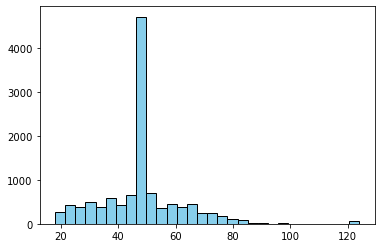

In [170]:
plt.hist(df['Edad maxima'], bins=30, color='skyblue', edgecolor='black')

In [171]:
#Antiguedad meses
negativos_Antiguedad_Meses= (df['Antiguedad Meses']< 0).sum()
print(f'Cantidad de valores negativos Antiguedad Meses: {negativos_Antiguedad_Meses}')

nulls_Antiguedad_Meses= df['Antiguedad Meses'].isnull().sum()
print(f'Cantidad de valores nulos Antiguedad Meses: {nulls_Antiguedad_Meses}')

Cantidad de valores negativos Antiguedad Meses: 0
Cantidad de valores nulos Antiguedad Meses: 3142


In [172]:
#Se imputa los valores nulos con la mediana 
df['Antiguedad Meses']= df['Edad maxima'].fillna(mediana_Edad_maxima)

(array([2.580e+02, 4.230e+02, 3.720e+02, 4.960e+02, 3.920e+02, 5.820e+02,
        4.260e+02, 6.550e+02, 4.703e+03, 7.070e+02, 3.610e+02, 4.560e+02,
        3.770e+02, 4.610e+02, 2.440e+02, 2.450e+02, 1.750e+02, 1.070e+02,
        9.400e+01, 2.300e+01, 2.100e+01, 6.000e+00, 8.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 5.500e+01]),
 array([ 18.        ,  21.53333333,  25.06666667,  28.6       ,
         32.13333333,  35.66666667,  39.2       ,  42.73333333,
         46.26666667,  49.8       ,  53.33333333,  56.86666667,
         60.4       ,  63.93333333,  67.46666667,  71.        ,
         74.53333333,  78.06666667,  81.6       ,  85.13333333,
         88.66666667,  92.2       ,  95.73333333,  99.26666667,
        102.8       , 106.33333333, 109.86666667, 113.4       ,
        116.93333333, 120.46666667, 124.        ]),
 <BarContainer object of 30 artists>)

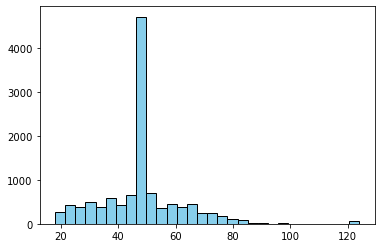

In [173]:
plt.hist(df['Antiguedad Meses'], bins=30, color='skyblue', edgecolor='black')

In [174]:
nulls_Residencia= df['Residente'].isnull().sum()
print(f'Cantidad de valores nulos Residencia: {nulls_Residencia}')

Cantidad de valores nulos Residencia: 3593


In [175]:
#Se remplaza valores faltantes por el valor mayoritario

moda= df['Residente'].mode()[0]
df['Residente'].fillna(moda,inplace=True)

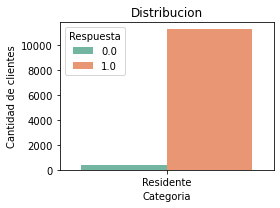

In [176]:
Residencia= ['Residente']

df_grafica= df[Residencia].melt(var_name='Variable', value_name='Respuesta')

conteo=df_grafica.groupby(['Variable', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize= (4,3))
sns.barplot(data=conteo, x='Variable', y='Cantidad', hue='Respuesta', palette='Set2')


plt.title(f'Distribucion')

plt.xlabel('Categoria')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Respuesta')

plt.tight_layout()
plt.show()

# Productos

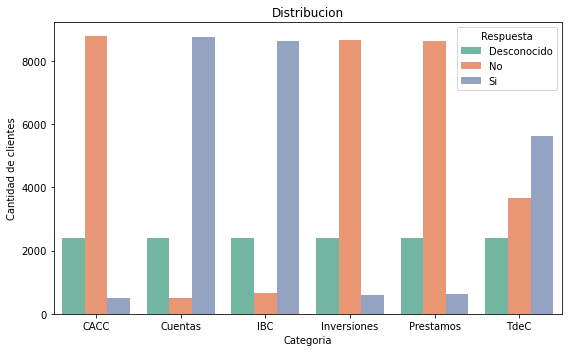

In [177]:
Variables_productos= ['Cuentas', 'IBC', 'TdeC', 'CACC',  'Prestamos', 'Inversiones']

df_grafica= df[Variables_productos].melt(var_name='Variable', value_name='Respuesta')

conteo=df_grafica.groupby(['Variable', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize= (8,5))
sns.barplot(data=conteo, x='Variable', y='Cantidad', hue='Respuesta', palette='Set2')


plt.title(f'Distribucion')

plt.xlabel('Categoria')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Respuesta')

plt.tight_layout()
plt.show()

In [178]:
#Se remplaza "Desconocido" por el valor mayoritario
for col in Variables_productos:
    valor_mayoritario= df.loc[df[col] != 'Desconocido', col].mode()[0]
    df[col]= df[col].replace('Desconocido', valor_mayoritario)

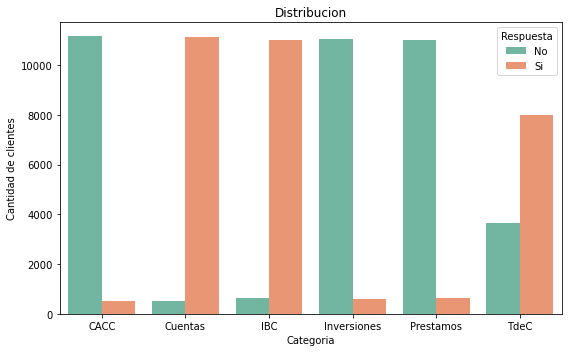

In [179]:
#Distribucion post tratamiento de 'Desconocido'
df_grafica= df[Variables_productos].melt(var_name='Variable', value_name='Respuesta')

conteo=df_grafica.groupby(['Variable', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize= (8,5))
sns.barplot(data=conteo, x='Variable', y='Cantidad', hue='Respuesta', palette='Set2')


plt.title(f'Distribucion')

plt.xlabel('Categoria')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Respuesta')

plt.tight_layout()
plt.show()

In [180]:
#Q_activas
nulls_Q_activas= df['Q_activas'].isnull().sum()
print(f'Cantidad de valores nulos Q_activas: {nulls_Q_activas}')

Cantidad de valores nulos Q_activas: 3783


In [181]:
#a lo valores nulos se sustitye por la mediana
df['Q_activas']= df['Q_activas'].fillna(df['MF'].median())

In [182]:
#Se aplica one-hot encodiing
df_encoded= pd.get_dummies(df, columns= Variables_productos, drop_first= False)
df_encoded

,Unnamed: 0,IdCliente,NPS,Categoria_nps,key,MF,MS,PBB,Q_activas,MontoTotalCompras_USD,CantidadTotalCompras_USD,MontoTotalComprasPromocion_USD,CantidadTotalComprasPromocion_USD,Key_y,cant_adicionales,Antiguedad Meses,Clasificacion cliente,Edad maxima,Edad minima,Linea Negocio,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1,afinidad_LAN,afinidad_OTROS,afinidad_PB,afinidad_VOLAR,Limite_unificado,l_posicion,Cuentas_No,Cuentas_Si,IBC_No,IBC_Si,TdeC_No,TdeC_Si,CACC_No,CACC_Si,Prestamos_No,Prestamos_Si,Inversiones_No,Inversiones_Si
0,0,8097901,10,Promotor,8097901_202207,1429.0,2667.0,4096.0,223.0,131,10,0,100,NaN,1,47.0,NaN,47.0,45.0,NaN,1.0,1.0,6.0,6.0,0.0,0.0,8.097901e+12,1,0,0,0,1559.725,16.248680,0,1,0,1,0,1,1,0,1,0,1,0
1,1,451943,10,Promotor,451943_202207,0.0,861.0,861.0,223.0,0,0,0,100,NaN,4,47.0,NaN,47.0,45.0,NaN,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,0,1,2200.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0
2,2,8176746,9,Promotor,8176746_202207,989.0,15.0,1004.0,223.0,0,0,0,100,NaN,0,47.0,NaN,47.0,45.0,NaN,1.0,31.0,0.0,0.0,0.0,0.0,8.176746e+12,0,0,0,1,0.000,13.913030,0,1,0,1,0,1,1,0,1,0,1,0
3,3,733821,7,Neutro,733821_202207,0.0,4361.0,4361.0,223.0,0,0,0,100,NaN,1,47.0,NaN,47.0,45.0,NaN,1.0,0.0,7.0,0.0,0.0,0.0,7.338212e+11,0,0,0,1,5850.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0
4,4,578720,10,Promotor,578720_202207,0.0,5269.0,5269.0,223.0,0,0,0,100,NaN,0,47.0,NaN,47.0,45.0,NaN,1.0,0.0,27.0,0.0,0.0,0.0,5.787202e+11,0,0,0,1,3000.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,11657,487915,10,Promotor,487915_202412,100.0,100.0,100.0,2.0,0,0,0,100,NaN,0,38.0,Pocket,38.0,38.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,4.879152e+11,0,0,0,1,1968.750,17.779389,0,1,0,1,0,1,1,0,1,0,1,0
11658,11658,5823903,10,Promotor,5823903_202412,30.0,616.0,646.0,1.0,0,0,0,100,NaN,0,33.0,Pas,33.0,33.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,5.823903e+12,0,0,0,1,850.000,12.835096,0,1,0,1,0,1,1,0,1,0,1,0
11659,11659,5690603,8,Neutro,5690603_202412,1289.0,7141.0,8430.0,2.0,0,0,0,100,NaN,0,46.0,Full,46.0,46.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,5.690603e+12,0,0,0,1,5900.000,17.204657,0,1,0,1,0,1,1,0,1,0,1,0
11660,11660,5276148,10,Promotor,5276148_202412,146.0,3.0,149.0,2.0,0,0,0,100,NaN,0,43.0,Pocket,43.0,43.0,RETAIL,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,1,0,3750.000,15.563604,0,1,0,1,1,0,1,0,1,0,1,0


# Tipo de cliente y Linea de negocio

In [183]:
#Cantidad de valores nulos
nulls_linea= df_encoded['Linea Negocio'].isnull().sum()
print(f'Cantidad de valores nulos Linea Negocio: {nulls_linea}')

nulls_clasif= df_encoded['Clasificacion cliente'].isnull().sum()
print(f'Cantidad de valores nulos Clasificacion cliente: {nulls_clasif}')

Cantidad de valores nulos Linea Negocio: 3142
Cantidad de valores nulos Clasificacion cliente: 3592


In [184]:
Variables=  ['Linea Negocio', 'Clasificacion cliente']

In [185]:
#Se imputan los valores faltantes con la moda
for col in Variables:
    moda=df_encoded[col].mode()[0]
    df_encoded[col]= df_encoded[col].fillna(moda)
    

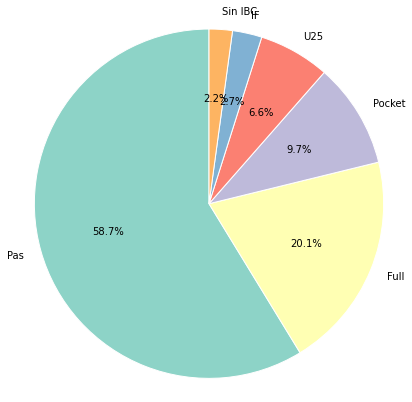

In [186]:
#Distribucion Clasificacion cliente
conteo = df_encoded['Clasificacion cliente'].value_counts()
conteo= conteo.sort_values(ascending=False)


colors=plt.cm.Set3.colors


plt.figure(figsize=(7, 7))
plt.pie(
    conteo.values,
    labels=conteo.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize':10}
)
plt.title('')
plt.axis('equal') 
plt.show()

In [187]:
#Agrupamos las lineas de negocio minoritarias

df_encoded['Linea Negocio']= df_encoded['Linea Negocio'].replace(['PERSONAL B. RETAIL', 'COMERCIOS', 'MIDDLE MARKET'], 'Otros')

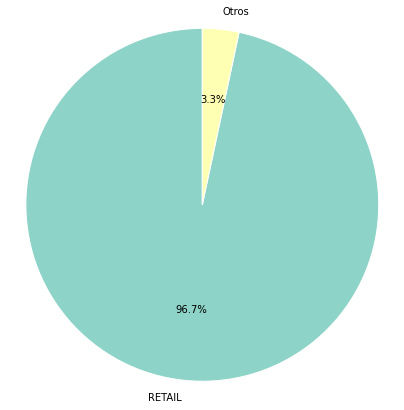

In [188]:
#Distribucion Linea de negocio
conteo = df_encoded['Linea Negocio'].value_counts()
conteo= conteo.sort_values(ascending=False)


colors=plt.cm.Set3.colors


plt.figure(figsize=(7, 7))
plt.pie(
    conteo.values,
    labels=conteo.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize':10}
)
plt.title('')
plt.axis('equal') 
plt.show()

Se decide analizar el nps segun la linea de negocio para ver que tan relevante es este valor para definir predecir nps. Se usa el test de chi cuadrado para evaluar si las diferencias entre las proporciones de promotores, neutros y detractores son estadisticamente relevantes o no.

In [189]:
from scipy.stats import chi2_contingency


tabla_chi = pd.crosstab(df_encoded['Linea Negocio'], df_encoded['NPS'])


chi2, p, dof, expected = chi2_contingency(tabla_chi)

print(f"p-value: {p:.4f}")
if p < 0.05:
    print("Hay diferencias significativas en la distribución de NPS entre segmentos.")
else:
    print("No hay diferencias significativas en la distribución de NPS entre segmentos.")


p-value: 0.1841
No hay diferencias significativas en la distribución de NPS entre segmentos.


Tras analizar la distribucion del NPS segun la linea de negocio no se encontraron diferencias significativas entre los segmentos "Retail" y "Otros". Dado que las proporciones de promotores, neutros y detractores es similar en ambos grupos, se concluye que esta variable no aporta valor explicativo relevante al modelo. Por lo tanto se decide eliminar del conjunto de variables predictoras.

In [190]:
del df_encoded['Linea Negocio']

In [191]:
#Se aplica one-hot encoding para la columna Clasificación cliente
Variable_one_hot= ['Clasificacion cliente']
df_encoded= pd.get_dummies(df_encoded, columns= Variable_one_hot, drop_first= False)
df_encoded

,Unnamed: 0,IdCliente,NPS,Categoria_nps,key,MF,MS,PBB,Q_activas,MontoTotalCompras_USD,CantidadTotalCompras_USD,MontoTotalComprasPromocion_USD,CantidadTotalComprasPromocion_USD,Key_y,cant_adicionales,Antiguedad Meses,Edad maxima,Edad minima,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1,afinidad_LAN,afinidad_OTROS,afinidad_PB,afinidad_VOLAR,Limite_unificado,l_posicion,Cuentas_No,Cuentas_Si,IBC_No,IBC_Si,TdeC_No,TdeC_Si,CACC_No,CACC_Si,Prestamos_No,Prestamos_Si,Inversiones_No,Inversiones_Si,Clasificacion cliente_Full,Clasificacion cliente_IF,Clasificacion cliente_Pas,Clasificacion cliente_Pocket,Clasificacion cliente_Sin IBC,Clasificacion cliente_U25
0,0,8097901,10,Promotor,8097901_202207,1429.0,2667.0,4096.0,223.0,131,10,0,100,NaN,1,47.0,47.0,45.0,1.0,1.0,6.0,6.0,0.0,0.0,8.097901e+12,1,0,0,0,1559.725,16.248680,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,1,451943,10,Promotor,451943_202207,0.0,861.0,861.0,223.0,0,0,0,100,NaN,4,47.0,47.0,45.0,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,0,1,2200.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
2,2,8176746,9,Promotor,8176746_202207,989.0,15.0,1004.0,223.0,0,0,0,100,NaN,0,47.0,47.0,45.0,1.0,31.0,0.0,0.0,0.0,0.0,8.176746e+12,0,0,0,1,0.000,13.913030,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
3,3,733821,7,Neutro,733821_202207,0.0,4361.0,4361.0,223.0,0,0,0,100,NaN,1,47.0,47.0,45.0,1.0,0.0,7.0,0.0,0.0,0.0,7.338212e+11,0,0,0,1,5850.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
4,4,578720,10,Promotor,578720_202207,0.0,5269.0,5269.0,223.0,0,0,0,100,NaN,0,47.0,47.0,45.0,1.0,0.0,27.0,0.0,0.0,0.0,5.787202e+11,0,0,0,1,3000.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,11657,487915,10,Promotor,487915_202412,100.0,100.0,100.0,2.0,0,0,0,100,NaN,0,38.0,38.0,38.0,1.0,4.0,11.0,0.0,0.0,0.0,4.879152e+11,0,0,0,1,1968.750,17.779389,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0
11658,11658,5823903,10,Promotor,5823903_202412,30.0,616.0,646.0,1.0,0,0,0,100,NaN,0,33.0,33.0,33.0,1.0,4.0,11.0,0.0,0.0,0.0,5.823903e+12,0,0,0,1,850.000,12.835096,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
11659,11659,5690603,8,Neutro,5690603_202412,1289.0,7141.0,8430.0,2.0,0,0,0,100,NaN,0,46.0,46.0,46.0,1.0,4.0,11.0,0.0,0.0,0.0,5.690603e+12,0,0,0,1,5900.000,17.204657,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0
11660,11660,5276148,10,Promotor,5276148_202412,146.0,3.0,149.0,2.0,0,0,0,100,NaN,0,43.0,43.0,43.0,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,1,0,3750.000,15.563604,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0


# Correlación

In [192]:
print(df_encoded.dtypes)

Unnamed: 0                             int64
IdCliente                              int64
NPS                                    int64
Categoria_nps                         object
key                                   object
MF                                   float64
MS                                   float64
PBB                                  float64
Q_activas                            float64
MontoTotalCompras_USD                  int32
CantidadTotalCompras_USD               int32
MontoTotalComprasPromocion_USD         int32
CantidadTotalComprasPromocion_USD      int32
Key_y                                 object
cant_adicionales                       int32
Antiguedad Meses                     float64
Edad maxima                          float64
Edad minima                          float64
Residente                            float64
Q_login_IL                           float64
Q_login_SA                           float64
Q_login_PG                           float64
Q_login_WA

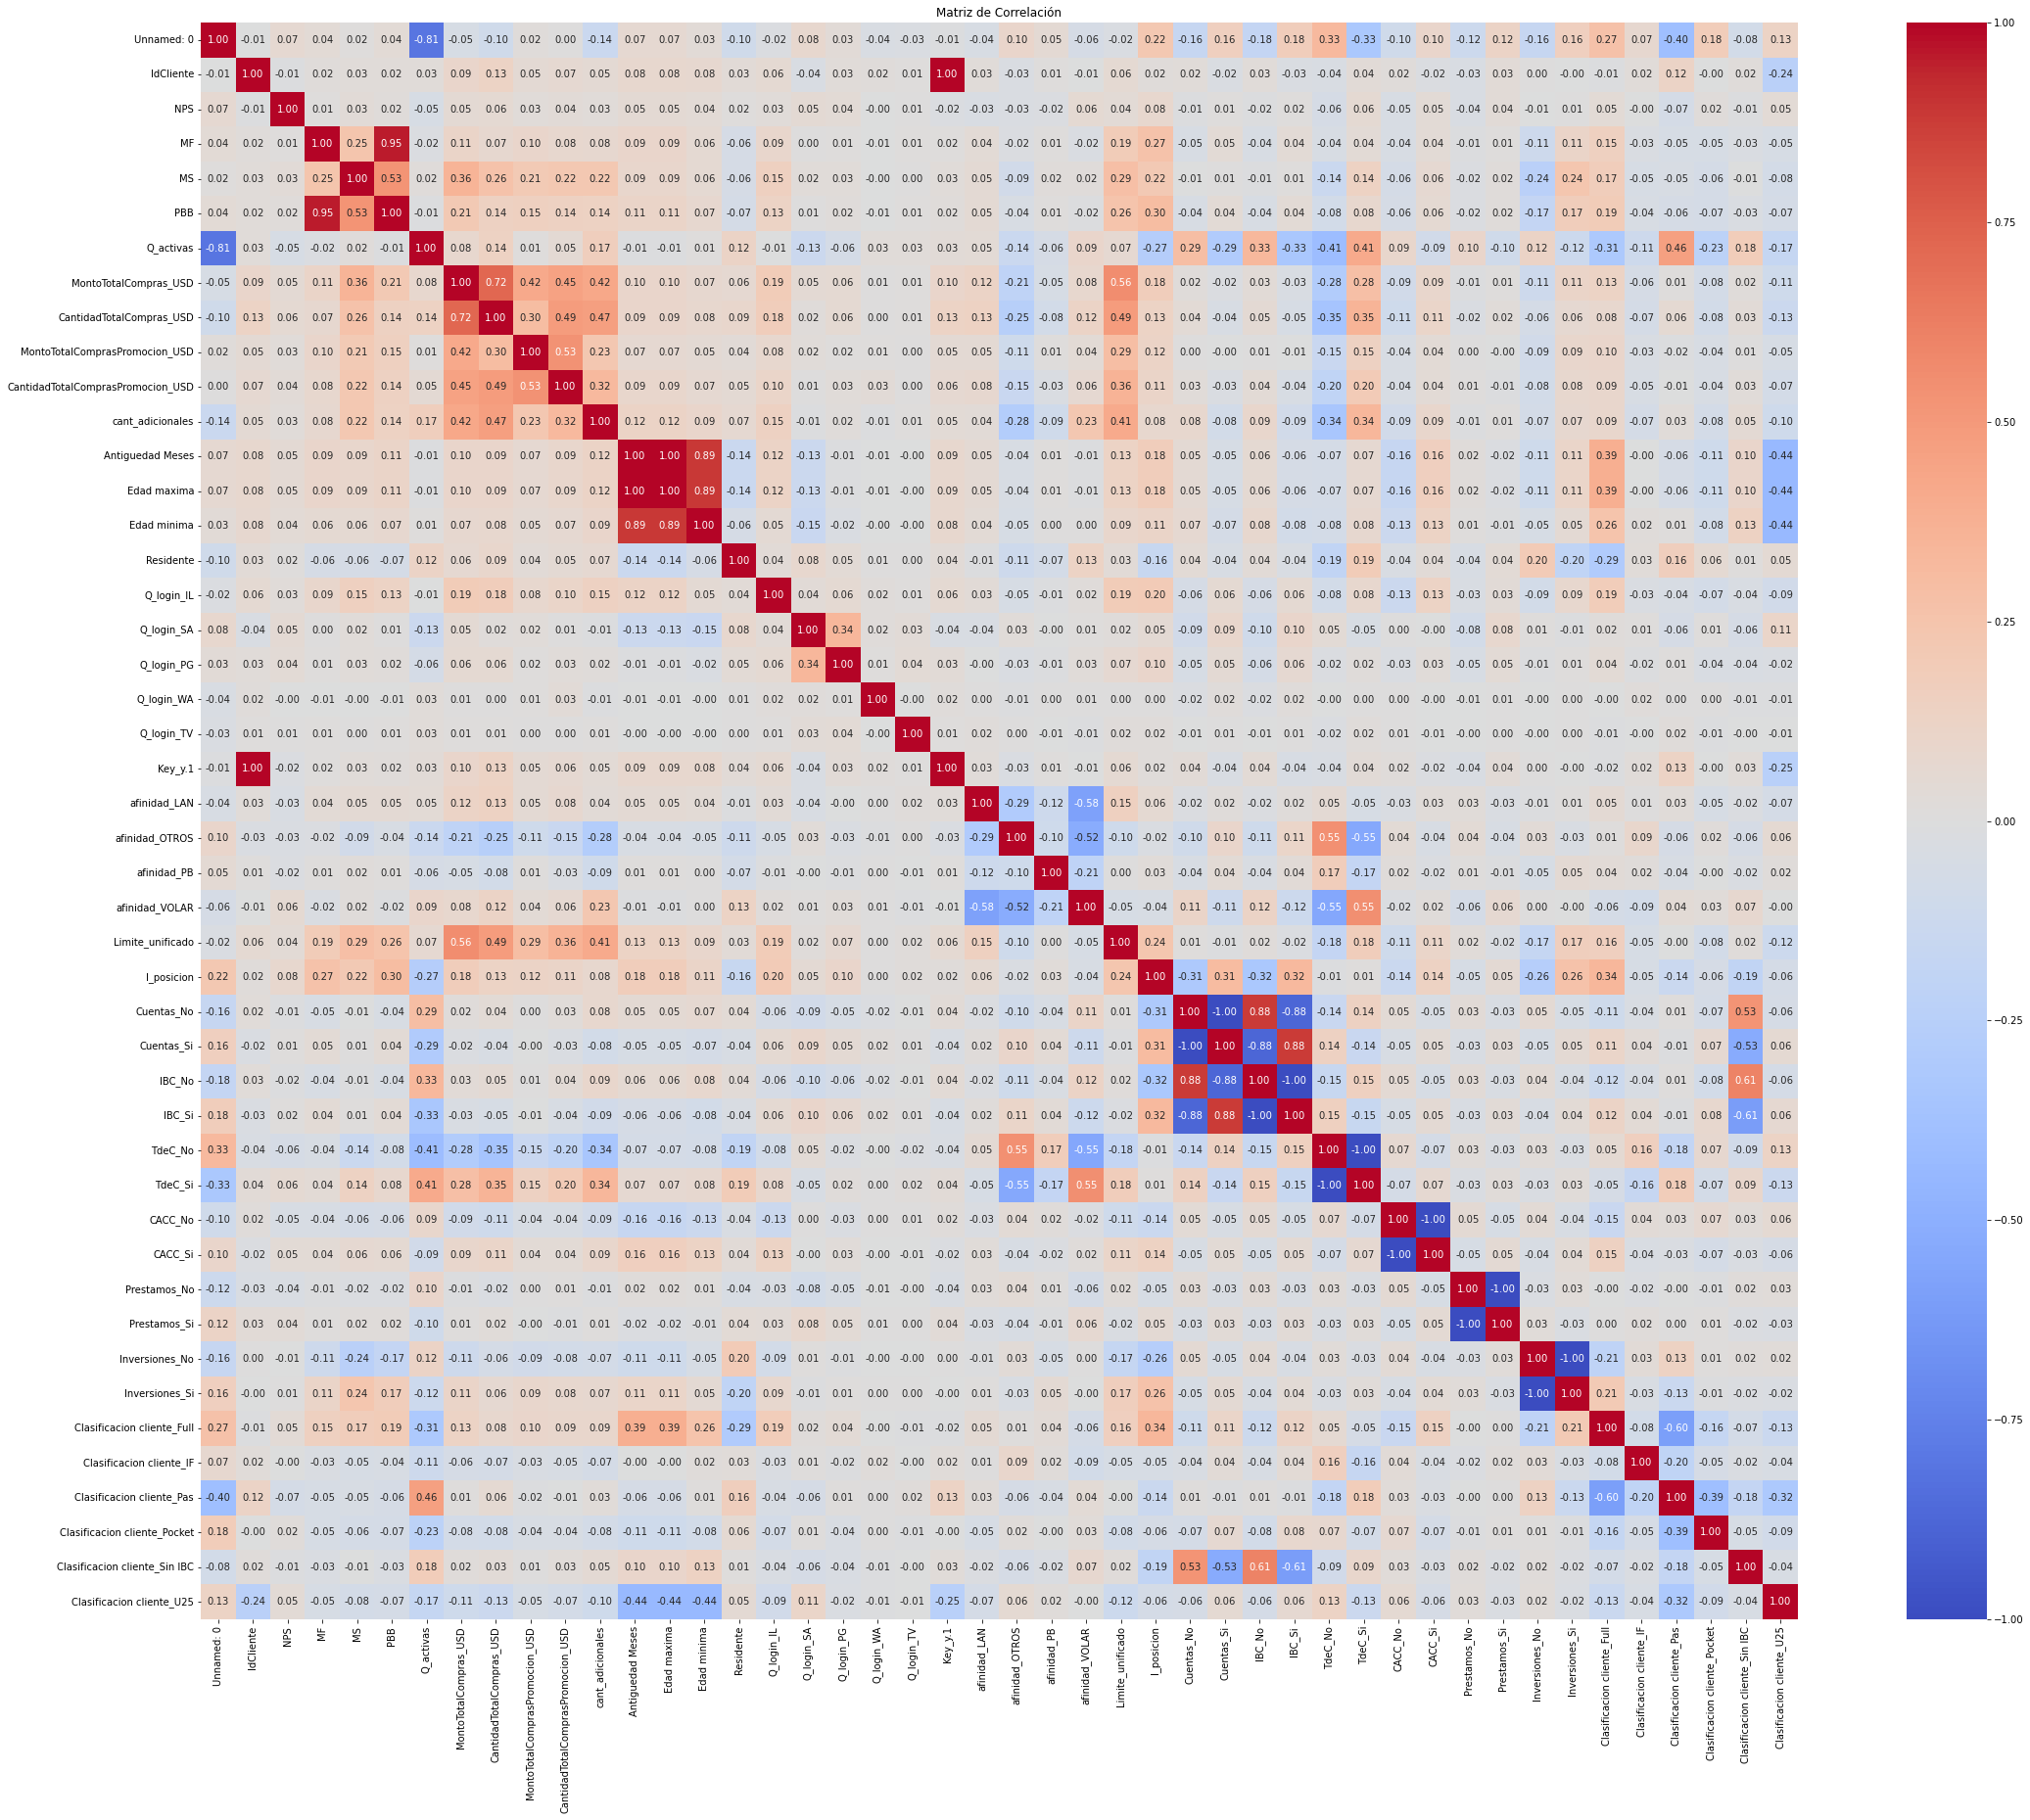

In [193]:
# Seleccionar solo variables numéricas
df_numericas = df_encoded.select_dtypes(include='number')

# Calcular la matriz de correlación
corr_matrix = df_numericas.corr()

# Crear heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


In [194]:
df_numericas

,Unnamed: 0,IdCliente,NPS,MF,MS,PBB,Q_activas,MontoTotalCompras_USD,CantidadTotalCompras_USD,MontoTotalComprasPromocion_USD,CantidadTotalComprasPromocion_USD,cant_adicionales,Antiguedad Meses,Edad maxima,Edad minima,Residente,Q_login_IL,Q_login_SA,Q_login_PG,Q_login_WA,Q_login_TV,Key_y.1,afinidad_LAN,afinidad_OTROS,afinidad_PB,afinidad_VOLAR,Limite_unificado,l_posicion,Cuentas_No,Cuentas_Si,IBC_No,IBC_Si,TdeC_No,TdeC_Si,CACC_No,CACC_Si,Prestamos_No,Prestamos_Si,Inversiones_No,Inversiones_Si,Clasificacion cliente_Full,Clasificacion cliente_IF,Clasificacion cliente_Pas,Clasificacion cliente_Pocket,Clasificacion cliente_Sin IBC,Clasificacion cliente_U25
0,0,8097901,10,1429.0,2667.0,4096.0,223.0,131,10,0,100,1,47.0,47.0,45.0,1.0,1.0,6.0,6.0,0.0,0.0,8.097901e+12,1,0,0,0,1559.725,16.248680,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,1,451943,10,0.0,861.0,861.0,223.0,0,0,0,100,4,47.0,47.0,45.0,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,0,1,2200.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
2,2,8176746,9,989.0,15.0,1004.0,223.0,0,0,0,100,0,47.0,47.0,45.0,1.0,31.0,0.0,0.0,0.0,0.0,8.176746e+12,0,0,0,1,0.000,13.913030,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
3,3,733821,7,0.0,4361.0,4361.0,223.0,0,0,0,100,1,47.0,47.0,45.0,1.0,0.0,7.0,0.0,0.0,0.0,7.338212e+11,0,0,0,1,5850.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
4,4,578720,10,0.0,5269.0,5269.0,223.0,0,0,0,100,0,47.0,47.0,45.0,1.0,0.0,27.0,0.0,0.0,0.0,5.787202e+11,0,0,0,1,3000.000,6.658211,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11657,11657,487915,10,100.0,100.0,100.0,2.0,0,0,0,100,0,38.0,38.0,38.0,1.0,4.0,11.0,0.0,0.0,0.0,4.879152e+11,0,0,0,1,1968.750,17.779389,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0
11658,11658,5823903,10,30.0,616.0,646.0,1.0,0,0,0,100,0,33.0,33.0,33.0,1.0,4.0,11.0,0.0,0.0,0.0,5.823903e+12,0,0,0,1,850.000,12.835096,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
11659,11659,5690603,8,1289.0,7141.0,8430.0,2.0,0,0,0,100,0,46.0,46.0,46.0,1.0,4.0,11.0,0.0,0.0,0.0,5.690603e+12,0,0,0,1,5900.000,17.204657,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0
11660,11660,5276148,10,146.0,3.0,149.0,2.0,0,0,0,100,0,43.0,43.0,43.0,1.0,4.0,11.0,0.0,0.0,0.0,NaN,0,0,1,0,3750.000,15.563604,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0


In [195]:
# Varibles con correlacion alta
umbral = 0.8
correlaciones = corr_matrix.abs().unstack().sort_values(ascending=False)

# Eliminar duplicados (A-B y B-A)
correlaciones = correlaciones[correlaciones < 1.0]
correlaciones_filtradas = correlaciones.drop_duplicates()

# Filtrar las más altas
correlaciones_altas = correlaciones_filtradas[correlaciones_filtradas > umbral]


print("Correlaciones altas (>|0.8|):\n")
print(correlaciones_altas)


Correlaciones altas (>|0.8|):

Prestamos_Si      Prestamos_No    1.000000
Cuentas_No        Cuentas_Si      1.000000
MF                PBB             0.953170
Antiguedad Meses  Edad minima     0.887395
IBC_No            Cuentas_No      0.875950
                  Cuentas_Si      0.875950
Q_activas         Unnamed: 0      0.805391
dtype: float64


In [196]:
del df_encoded['Prestamos_No']
del df_encoded['Cuentas_No']
del df_encoded['MF']
del df_encoded['IBC_No']
del df_encoded['Edad minima']

#Borramos columnas no predictoras
del df_encoded['Key_y.1']
del df_encoded['Key_y']
del df_encoded['Unnamed: 0']

# NPS

In [197]:
df_encoded['detractor']=np.where(df_encoded['NPS']<7,True,False)
df_encoded['detractor'].value_counts()
del df_encoded['NPS']
del df_encoded['Categoria_nps']

#Se elimina Customer y Key
del df_encoded['IdCliente']
del df_encoded['key']

In [198]:
print(df_encoded.isnull().sum().sum())

0


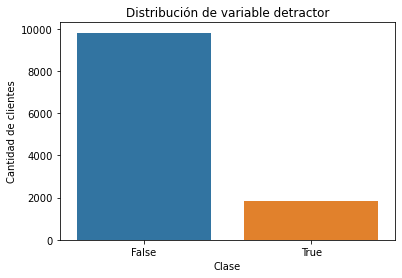

In [199]:
#desbalanceo de clases
sns.countplot(x='detractor', data= df_encoded)
plt.title('Distribución de variable detractor')
plt.xlabel('Clase')
plt.ylabel('Cantidad de clientes')
plt.show()

In [200]:
print(df_encoded.dtypes)

MS                                   float64
PBB                                  float64
Q_activas                            float64
MontoTotalCompras_USD                  int32
CantidadTotalCompras_USD               int32
MontoTotalComprasPromocion_USD         int32
CantidadTotalComprasPromocion_USD      int32
cant_adicionales                       int32
Antiguedad Meses                     float64
Edad maxima                          float64
Residente                            float64
Q_login_IL                           float64
Q_login_SA                           float64
Q_login_PG                           float64
Q_login_WA                           float64
Q_login_TV                           float64
afinidad_LAN                           uint8
afinidad_OTROS                         uint8
afinidad_PB                            uint8
afinidad_VOLAR                         uint8
Limite_unificado                     float64
l_posicion                           float64
Cuentas_Si

# Transformaciones finales

In [201]:
#pasamos a bool algunas variables
cols_uint8 = df_encoded.select_dtypes(include='uint8').columns
for col in cols_uint8:
    if df_encoded[col].dropna().isin([0,1]).all():  # chequea que solo tenga 0s y 1s
        df_encoded[col] = df_encoded[col].astype(bool)


In [202]:
print(df_encoded.dtypes)

MS                                   float64
PBB                                  float64
Q_activas                            float64
MontoTotalCompras_USD                  int32
CantidadTotalCompras_USD               int32
MontoTotalComprasPromocion_USD         int32
CantidadTotalComprasPromocion_USD      int32
cant_adicionales                       int32
Antiguedad Meses                     float64
Edad maxima                          float64
Residente                            float64
Q_login_IL                           float64
Q_login_SA                           float64
Q_login_PG                           float64
Q_login_WA                           float64
Q_login_TV                           float64
afinidad_LAN                            bool
afinidad_OTROS                          bool
afinidad_PB                             bool
afinidad_VOLAR                          bool
Limite_unificado                     float64
l_posicion                           float64
Cuentas_Si

In [203]:
#df_encoded.to_csv('base_final_EDA.csv', index=False)

# PCA - Análisis de componentes principales

In [204]:
X = df_encoded.drop(columns=['detractor'])
y = df_encoded['detractor']                

In [205]:
#Se normalizan los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [206]:
pca = PCA(n_components=0.90) 
X_pca = pca.fit_transform(X_scaled)

In [207]:
eigenvalues=pca.explained_variance_

In [208]:
var_explicada = pca.explained_variance_ratio_
var_acumulada = var_explicada.cumsum()

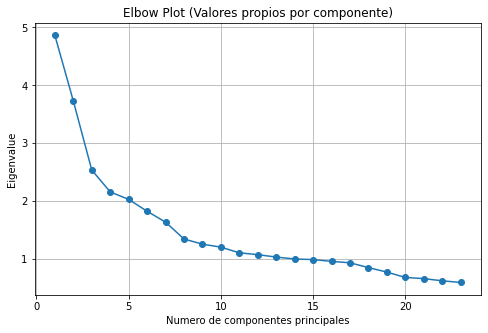

In [209]:
#Elbow test
plt.figure(figsize=(8,5))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, marker='o')
plt.xlabel('Numero de componentes principales')
plt.ylabel('Eigenvalue')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

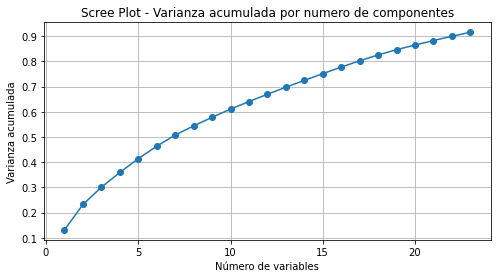

In [211]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.title('Scree Plot - Varianza acumulada por numero de componentes')
plt.xlabel('Número de variables')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

#Quedan 24 variables

In [98]:
columnas_pca = [f'PC{i+1}' for i in range(X_pca.shape[1])] 
df_pca = pd.DataFrame(X_pca, columns=columnas_pca)

In [99]:
df_pca['detractor'] = y.reset_index(drop=True)

In [100]:
print(df_pca.shape)
df_pca.head()

(11662, 24)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,detractor
0,0.020612,-1.067434,-0.183352,-0.395836,1.011059,-1.442562,0.905592,-0.358844,-1.789927,0.231967,-0.278316,-0.016959,-0.164341,0.085462,-0.252106,-0.115961,0.669981,0.079488,0.307529,-0.142565,-0.564681,-0.756330,0.225692,False
1,0.308996,-2.296656,-0.134726,-0.837403,-0.436957,-1.078546,0.162226,-0.225236,0.609320,-0.074767,-0.323423,0.097829,0.145616,-0.234507,0.133055,-0.273379,-0.011859,-0.686553,-0.320793,1.081127,0.824452,-0.776378,1.246922,False
2,-0.168187,-1.725878,-0.019406,-1.205460,-0.689013,-1.368730,0.345278,-0.048787,0.451900,0.421761,-0.126111,0.199824,0.199737,0.112594,0.252267,-0.369381,-0.746538,0.961509,0.922751,0.176392,0.061460,-0.142977,-0.287236,False
3,0.100897,-2.093949,-0.078882,-0.691290,-0.365926,-1.166991,0.375362,-0.182808,0.638945,0.126156,-0.019902,0.045143,0.020319,-0.083037,0.097831,-0.255708,0.367311,-0.380766,-0.244120,0.715930,-0.017971,-0.489708,0.206617,False
4,-0.252965,-2.079978,-0.147365,-0.789021,-0.549603,-1.115330,0.341884,0.254271,0.401313,0.104248,0.062506,0.096012,-0.076186,0.023460,-0.020145,-0.223684,0.717644,-0.026378,-0.084800,1.179390,-0.046907,0.033416,-0.225993,False


In [101]:
#df_pca.to_csv('base_final_PCA.csv', sep=';', index=False)

In [102]:
cargas= pd.DataFrame (pca.components_.T,
                    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
                    index=X.columns)

In [103]:
cargas

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
MS,0.211715,0.126366,-0.052411,0.164614,-0.009582,-0.017703,0.101000,0.125347,0.094949,0.360275,0.329065,-0.116869,0.015699,0.043212,0.000821,-0.068340,0.171610,-0.032903,-0.029444,0.240469,0.124900,-0.138514,-0.220678
PBB,0.164538,0.148326,-0.028116,0.114270,-0.008123,-0.050277,0.081946,0.135543,0.055410,0.493895,0.342640,-0.146213,0.012764,0.060420,0.024811,-0.070537,0.235637,0.047728,-0.039554,-0.067240,0.061422,-0.009681,0.105968
Q_activas,0.112808,-0.309537,0.080400,0.014315,0.137353,-0.209160,0.218253,0.059267,0.027544,0.069042,-0.050938,-0.015772,0.009503,0.070202,0.054522,-0.082600,-0.023570,-0.039254,0.075650,0.233744,-0.301148,-0.064855,0.187373
MontoTotalCompras_USD,0.319012,0.038556,-0.135222,0.143259,0.185637,0.089060,-0.070125,-0.014394,0.070410,-0.073355,-0.027924,-0.025814,0.013787,-0.040363,-0.010801,-0.004010,-0.079297,-0.166587,-0.055438,0.006126,-0.066191,0.107298,-0.402399
CantidadTotalCompras_USD,0.319537,-0.015599,-0.127385,0.085633,0.182157,0.078631,-0.076501,-0.049338,0.023160,-0.111500,-0.077100,-0.025066,0.031836,-0.060830,-0.016091,0.004258,-0.129103,-0.236622,-0.055882,0.010395,-0.035359,0.062556,-0.399716
MontoTotalComprasPromocion_USD,0.208438,0.048634,-0.102543,0.151625,0.142949,0.077469,-0.103081,-0.055023,0.234785,-0.157370,-0.023563,0.133495,-0.102112,0.044430,-0.027216,0.199186,0.281333,0.435543,0.225234,0.042126,0.005342,-0.016063,0.206216
CantidadTotalComprasPromocion_USD,0.249523,0.025915,-0.102644,0.155850,0.171964,0.085684,-0.125929,-0.079334,0.199591,-0.189922,-0.066774,0.084452,-0.063302,0.053987,-0.024909,0.159178,0.177293,0.240984,0.139852,0.010132,0.054747,-0.080681,0.033044
cant_adicionales,0.280157,-0.046031,-0.059137,0.037804,0.049019,0.050127,-0.072503,-0.042442,0.044083,-0.029007,-0.086943,-0.032229,0.061660,-0.095927,0.030763,-0.044659,-0.158491,-0.323991,-0.173115,0.080645,0.365346,-0.193940,0.616015
Antiguedad Meses,0.163389,0.161892,0.416003,-0.200950,0.056984,-0.191571,-0.197408,0.044110,-0.006176,-0.094724,0.009180,0.014299,-0.009936,-0.015893,-0.005699,-0.029336,0.070577,0.087414,-0.222074,0.037398,0.069460,-0.001110,-0.075334
Edad maxima,0.163389,0.161892,0.416003,-0.200950,0.056984,-0.191571,-0.197408,0.044110,-0.006176,-0.094724,0.009180,0.014299,-0.009936,-0.015893,-0.005699,-0.029336,0.070577,0.087414,-0.222074,0.037398,0.069460,-0.001110,-0.075334


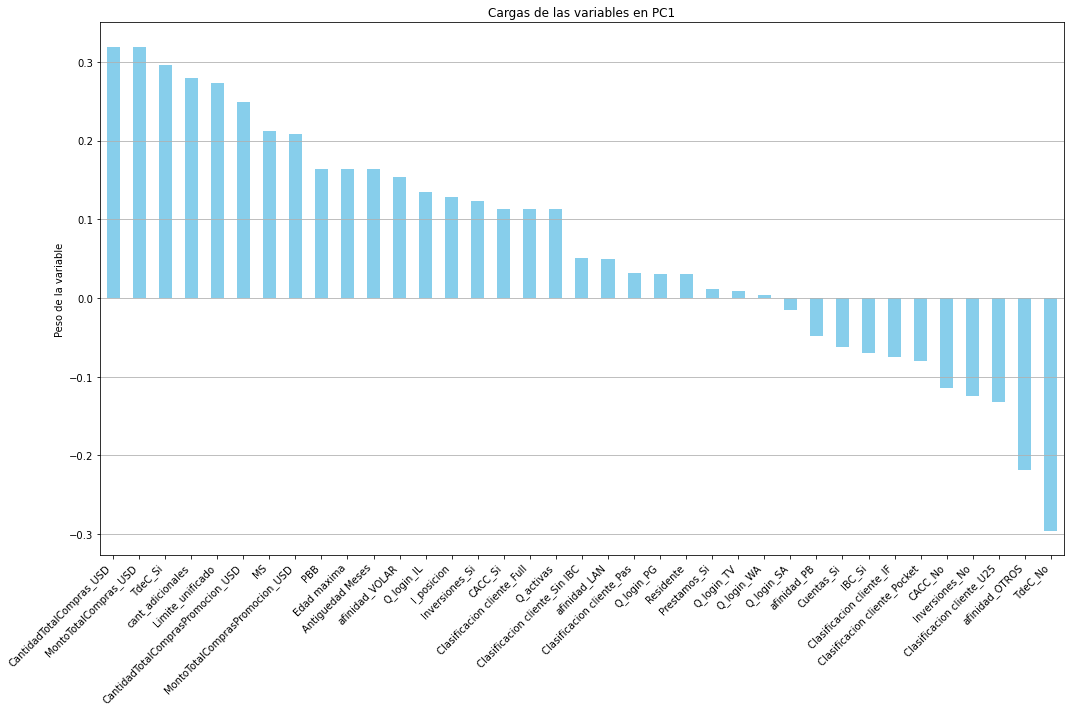

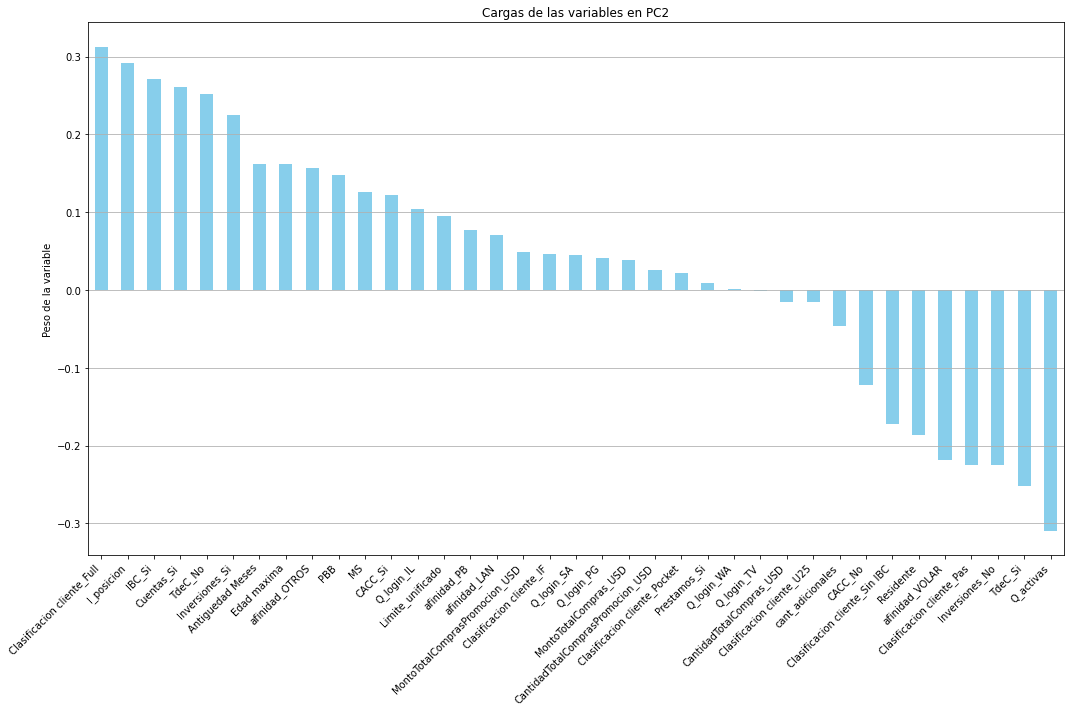

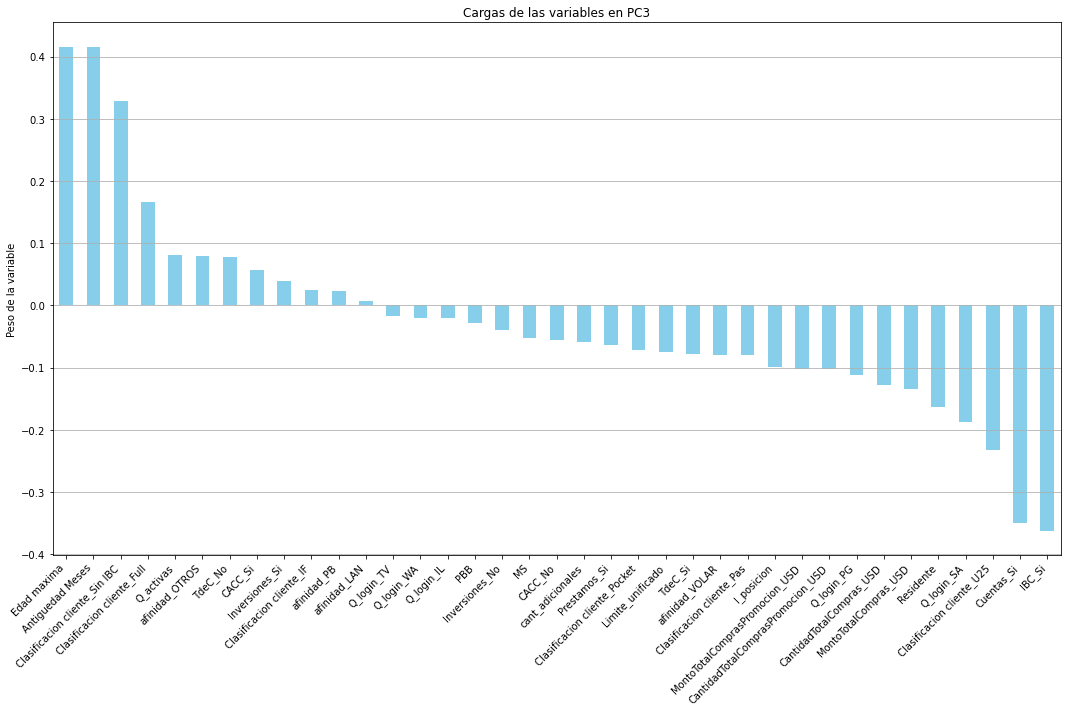

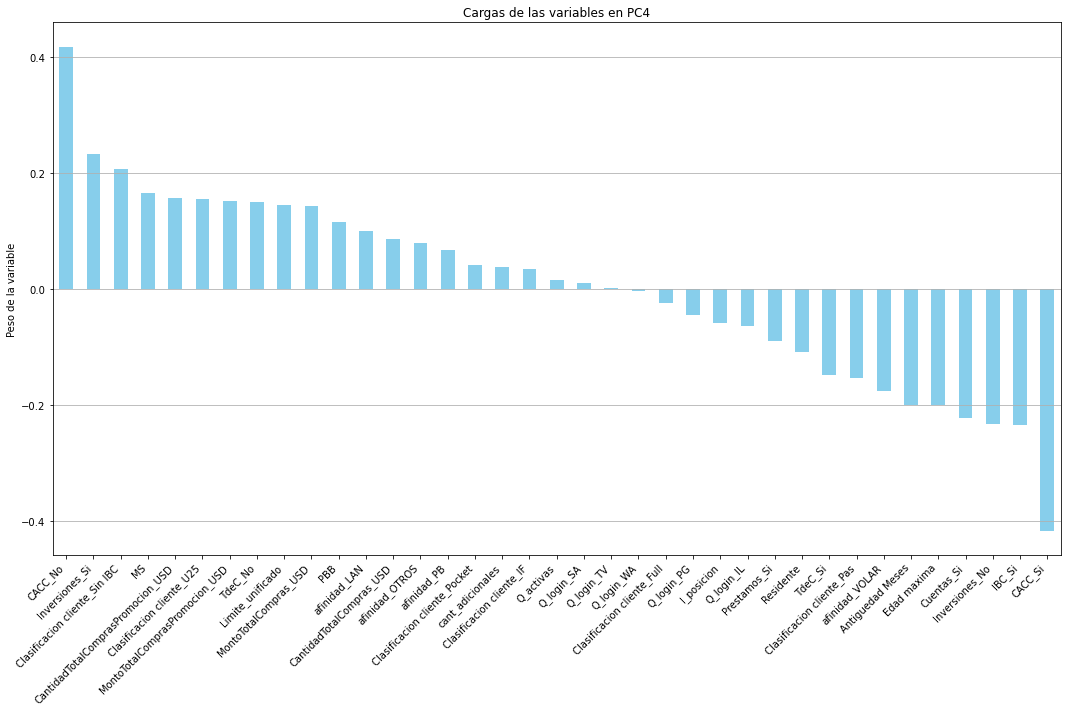

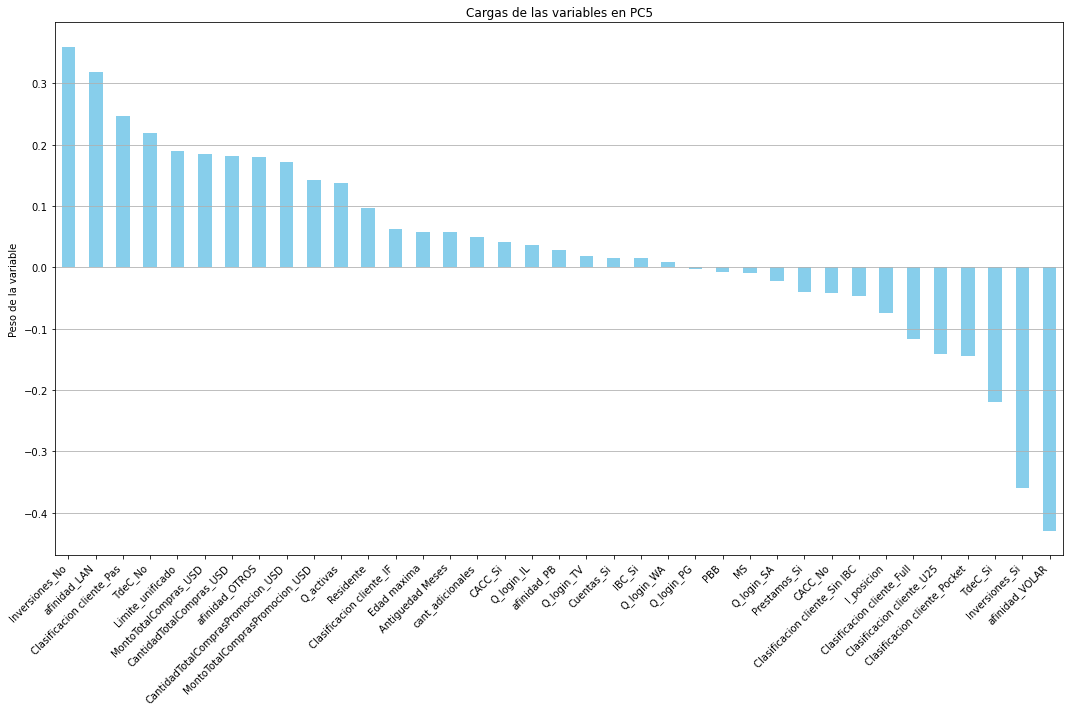

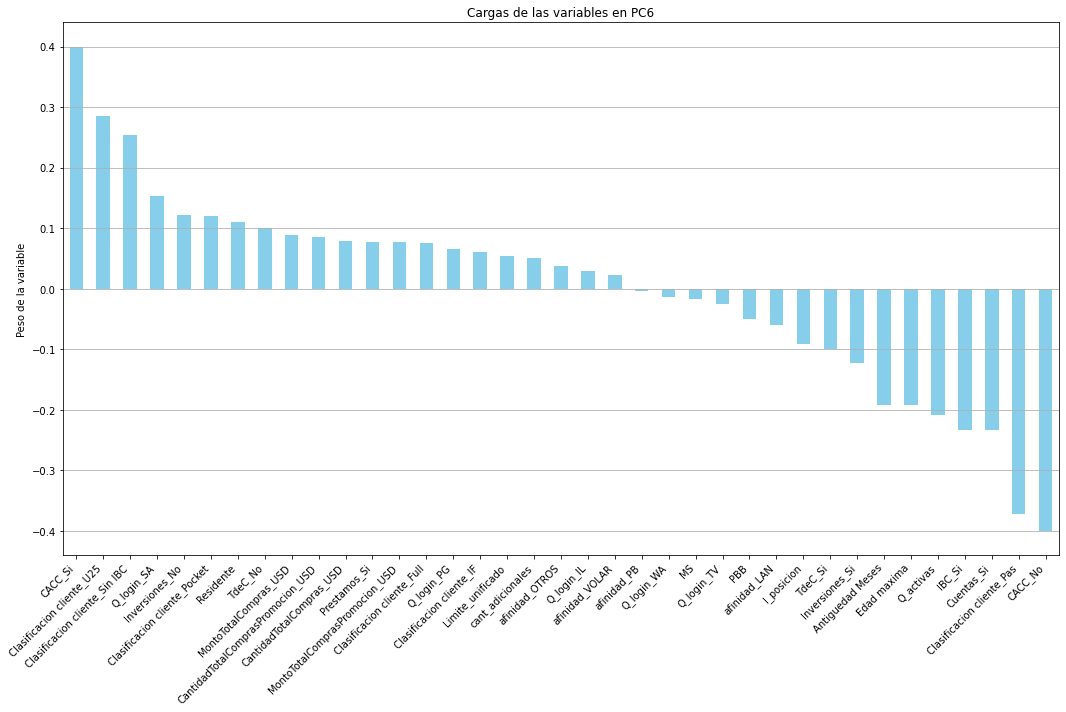

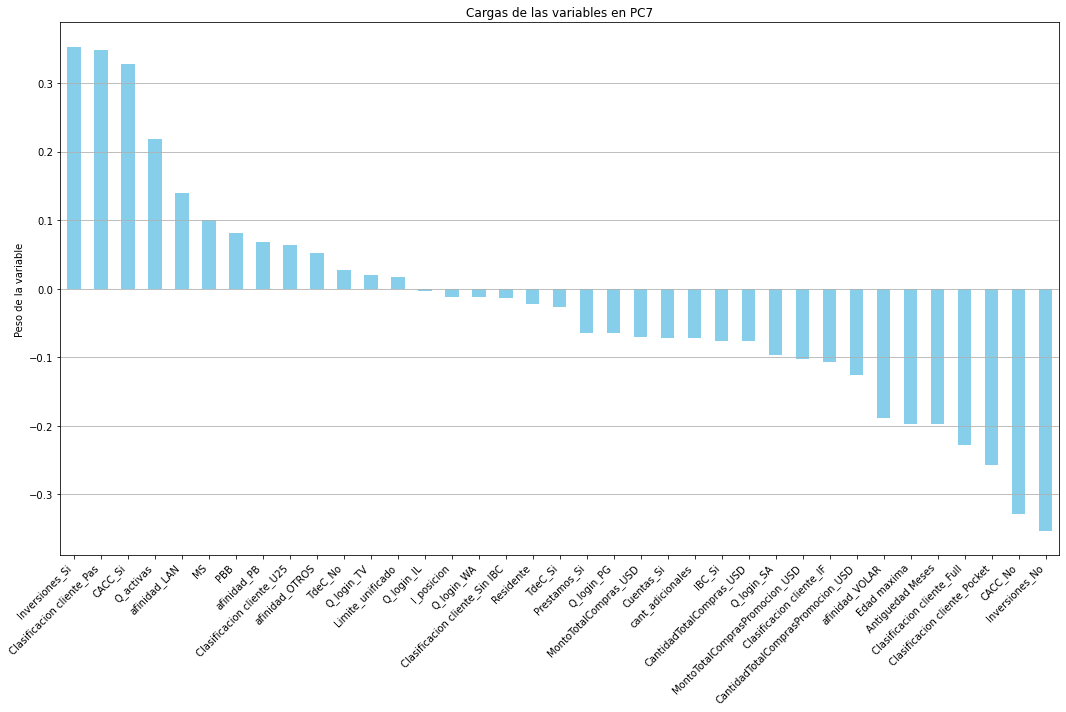

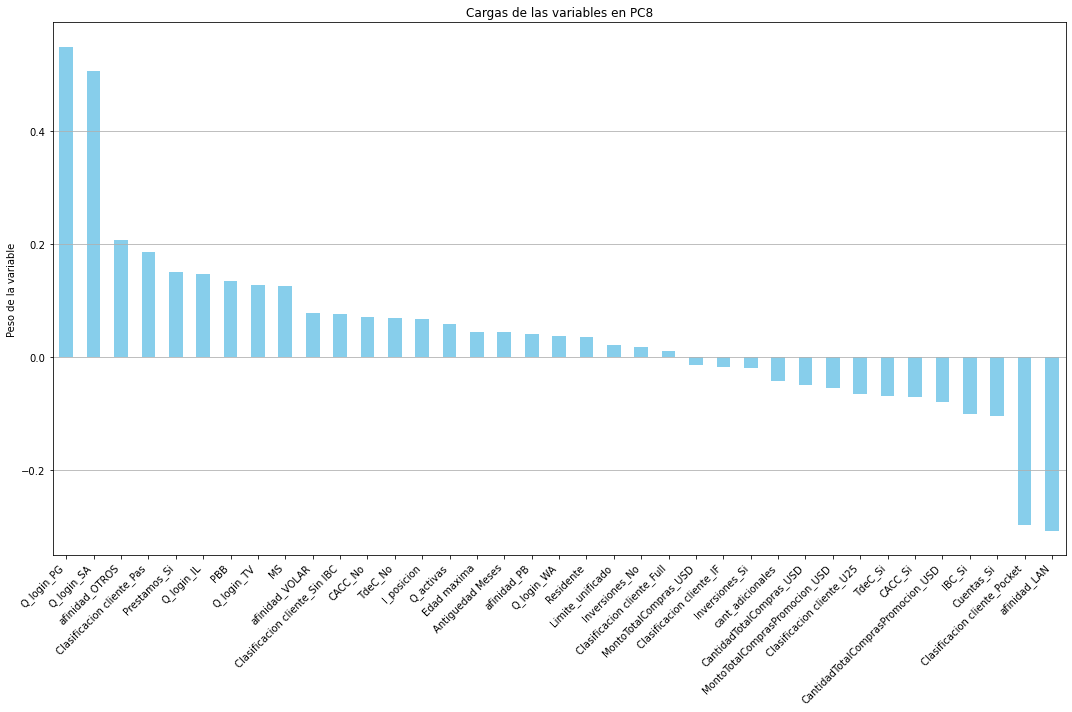

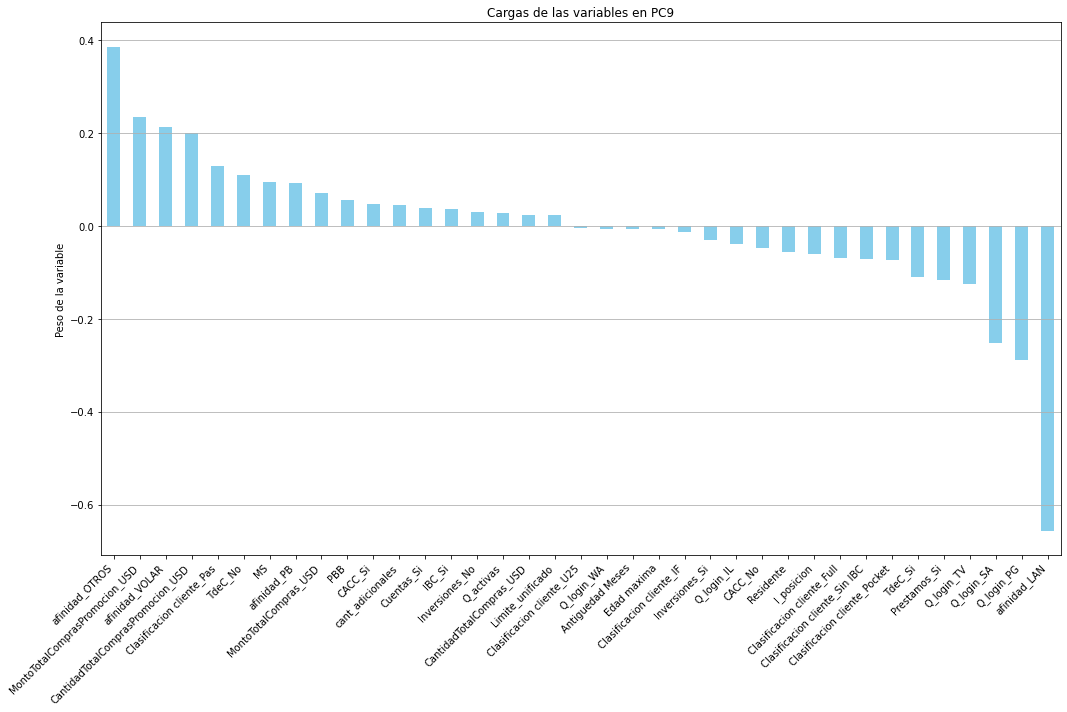

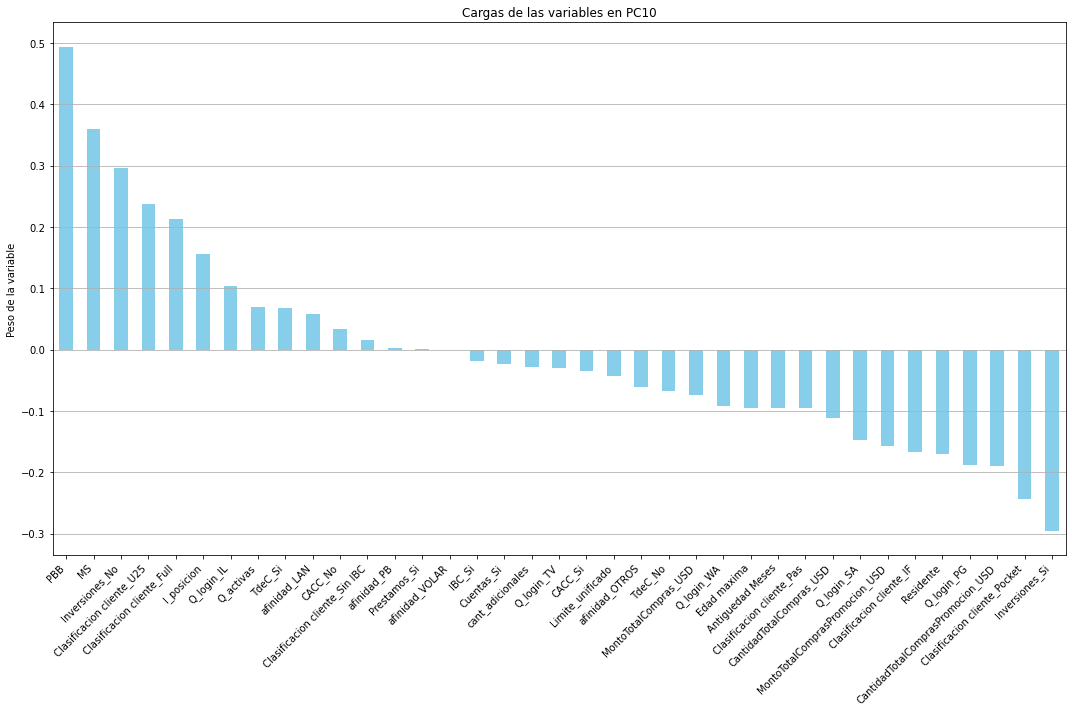

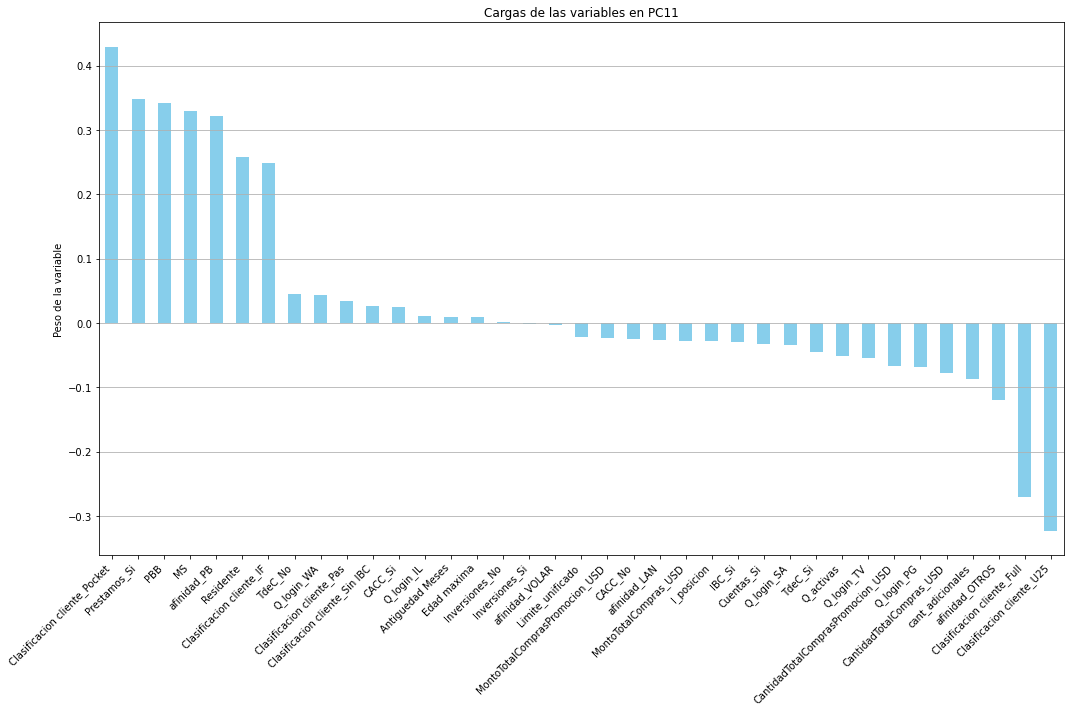

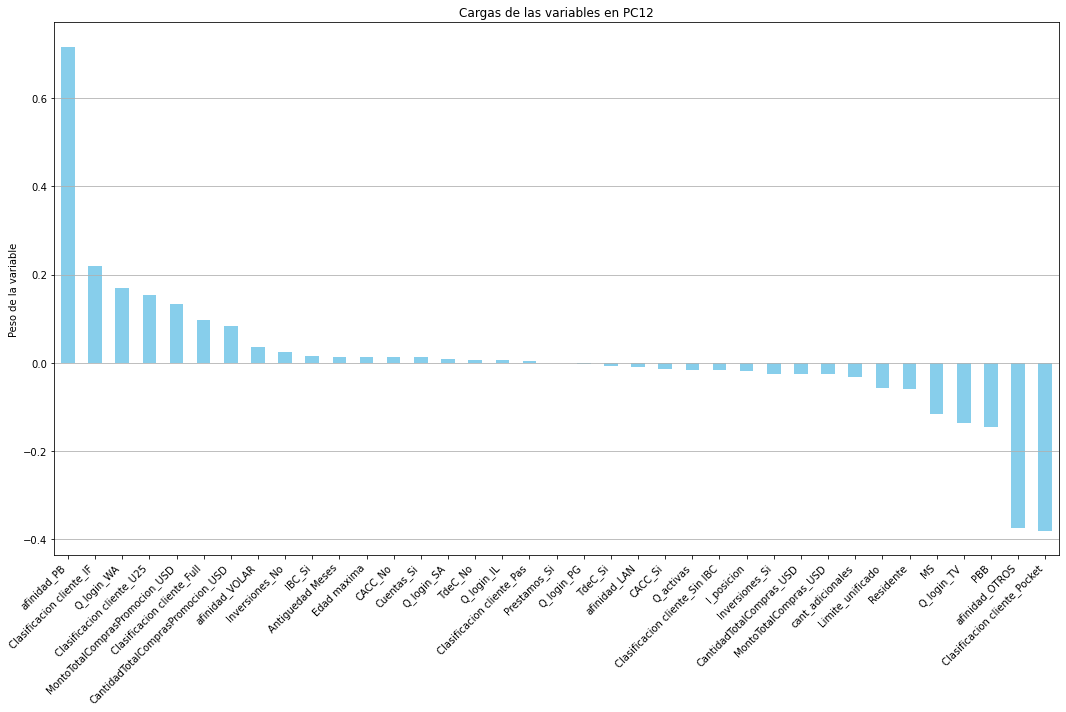

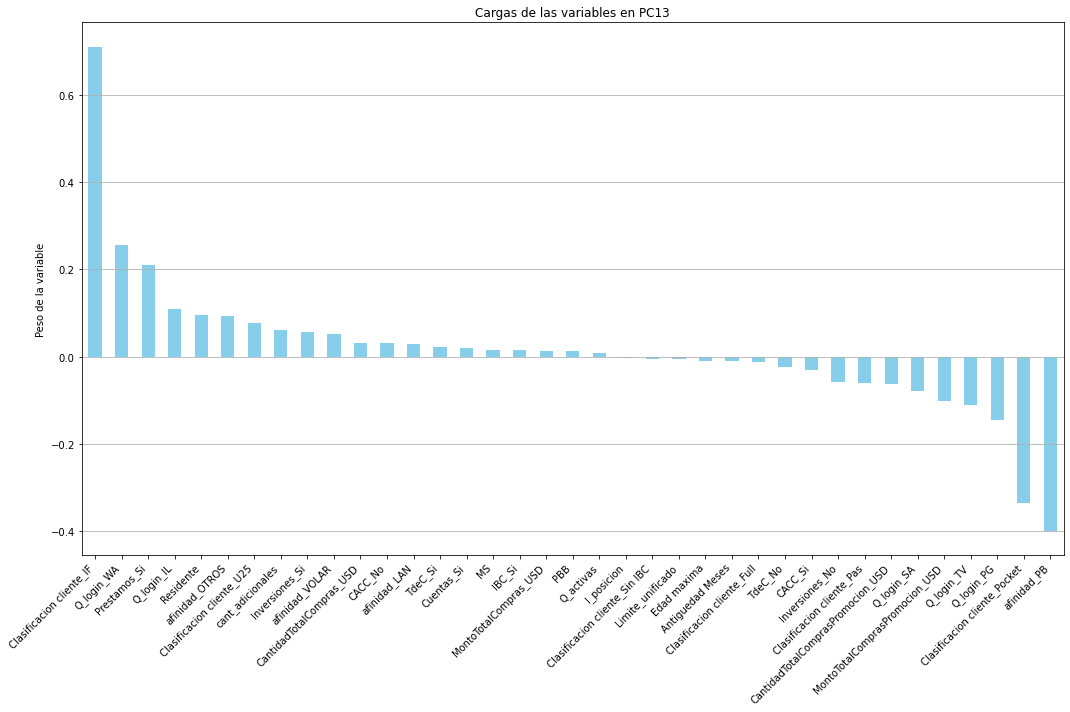

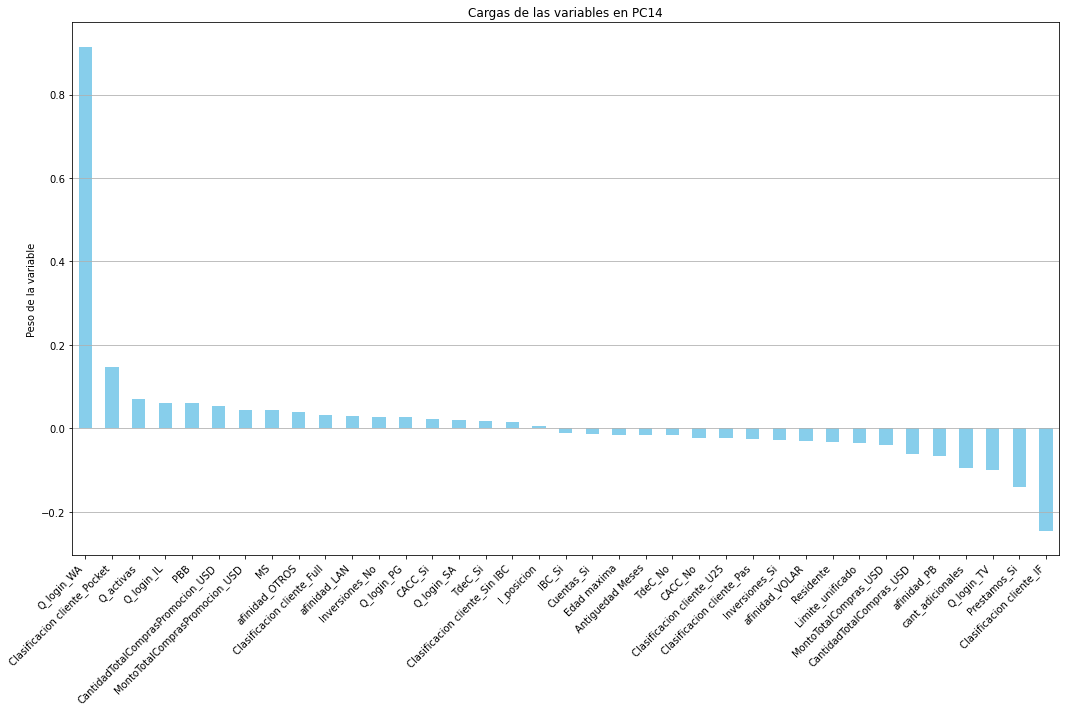

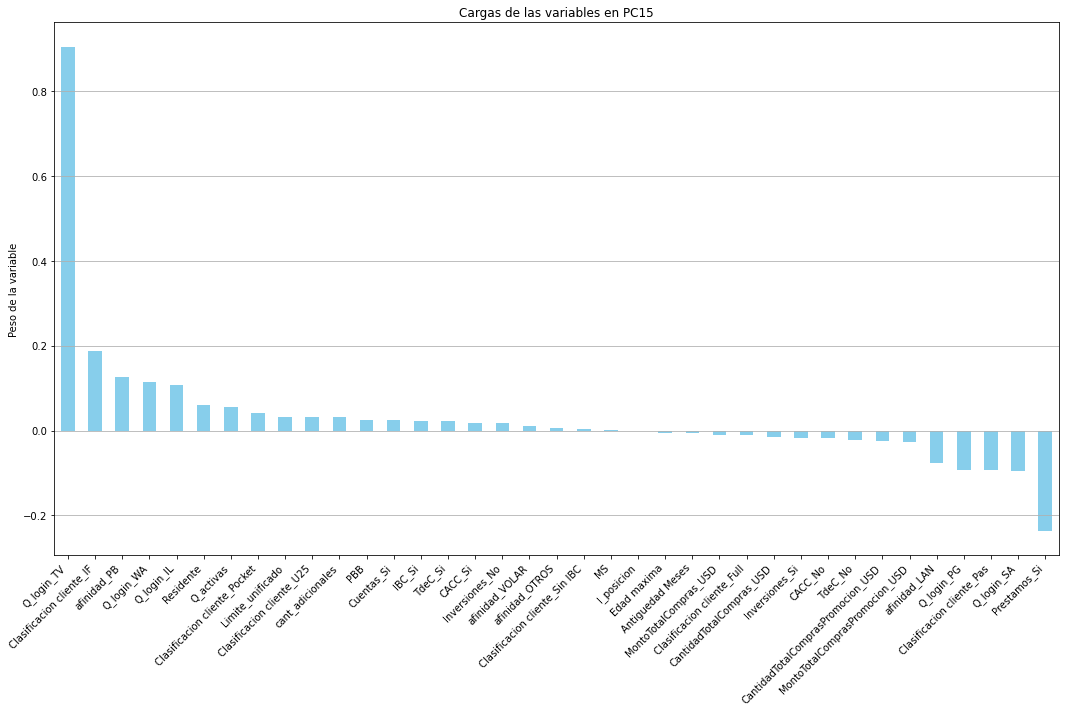

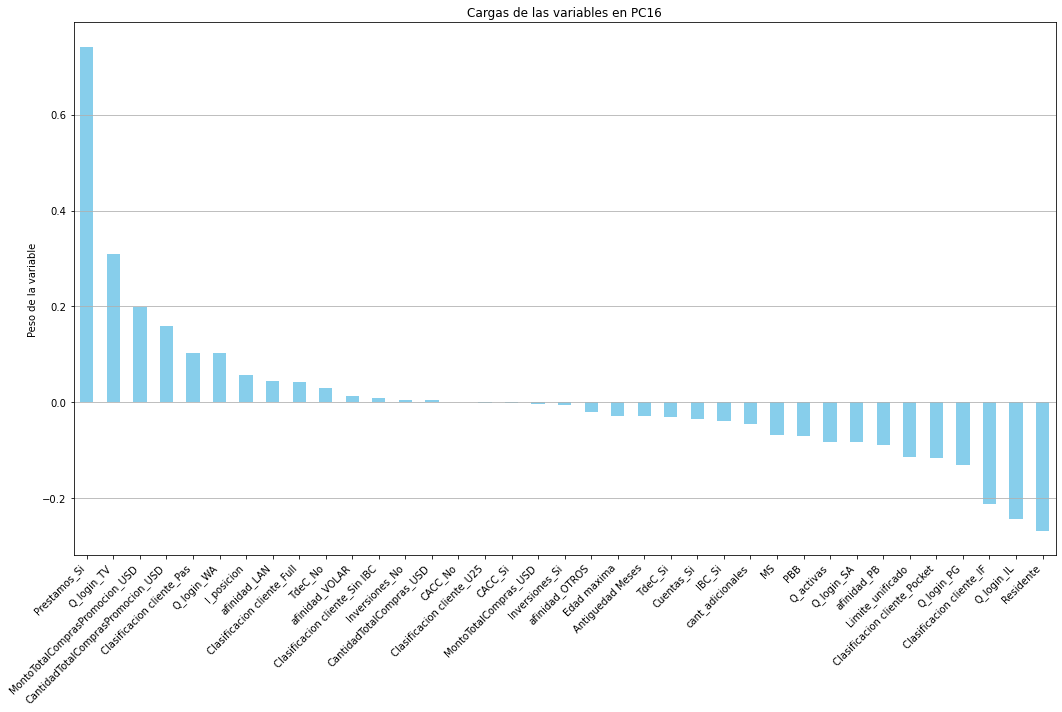

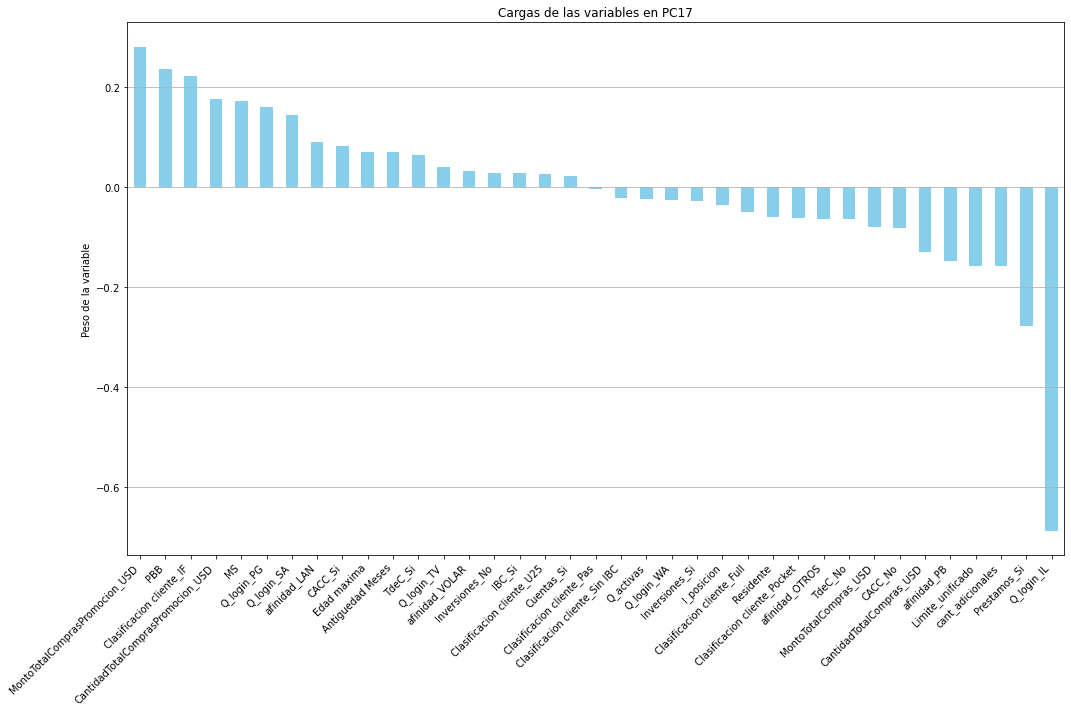

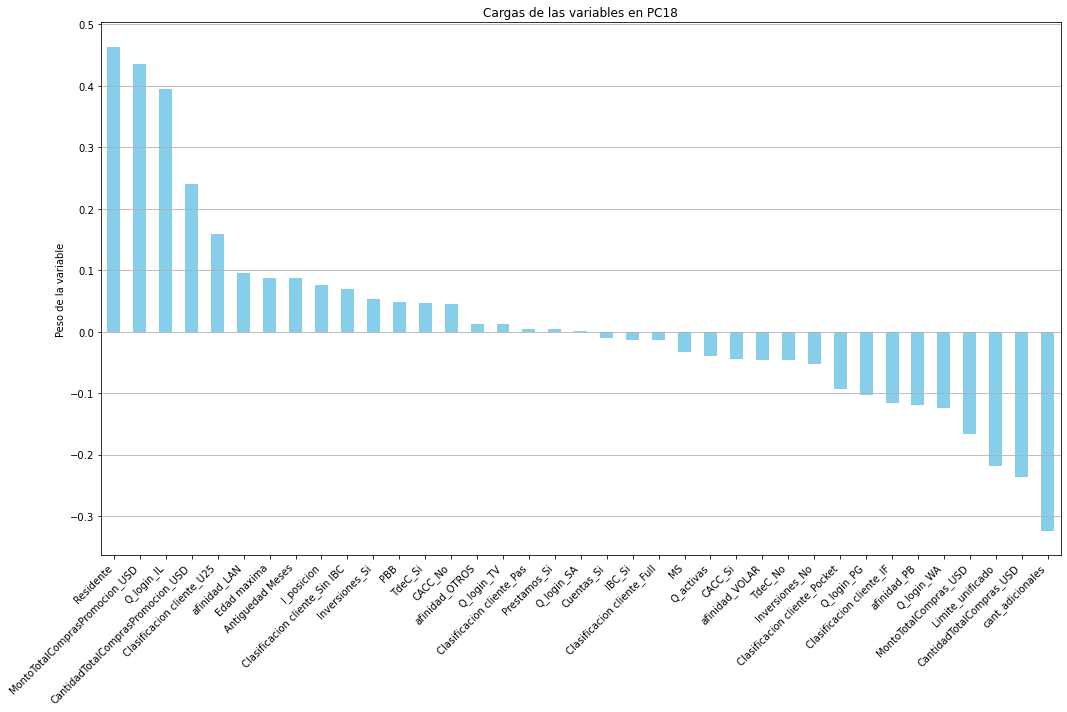

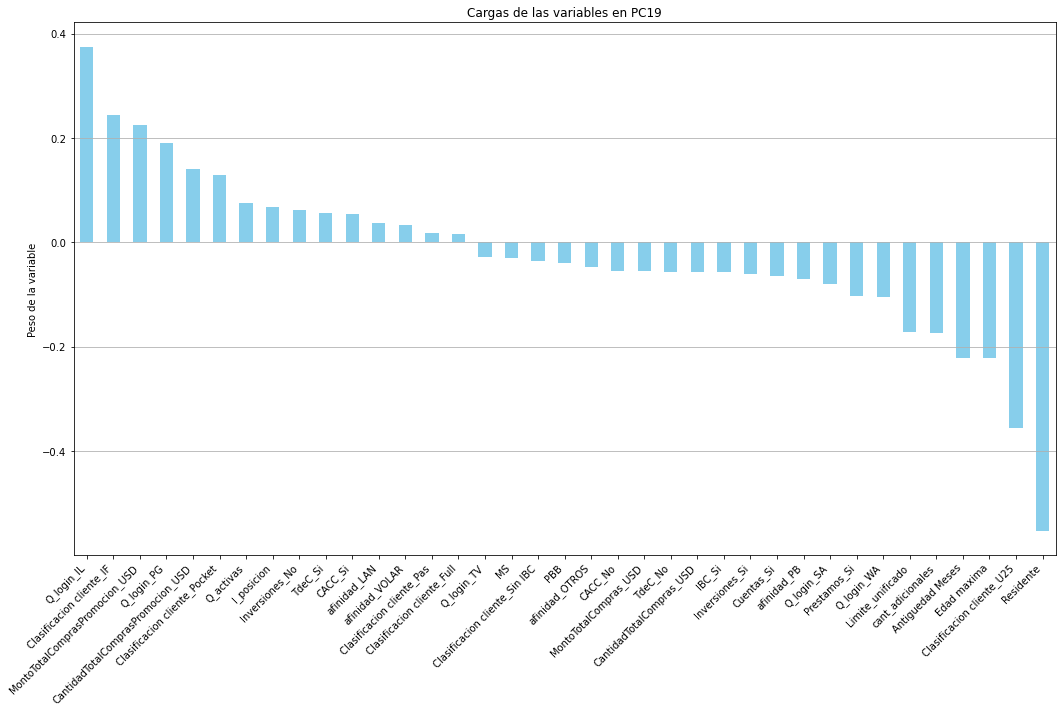

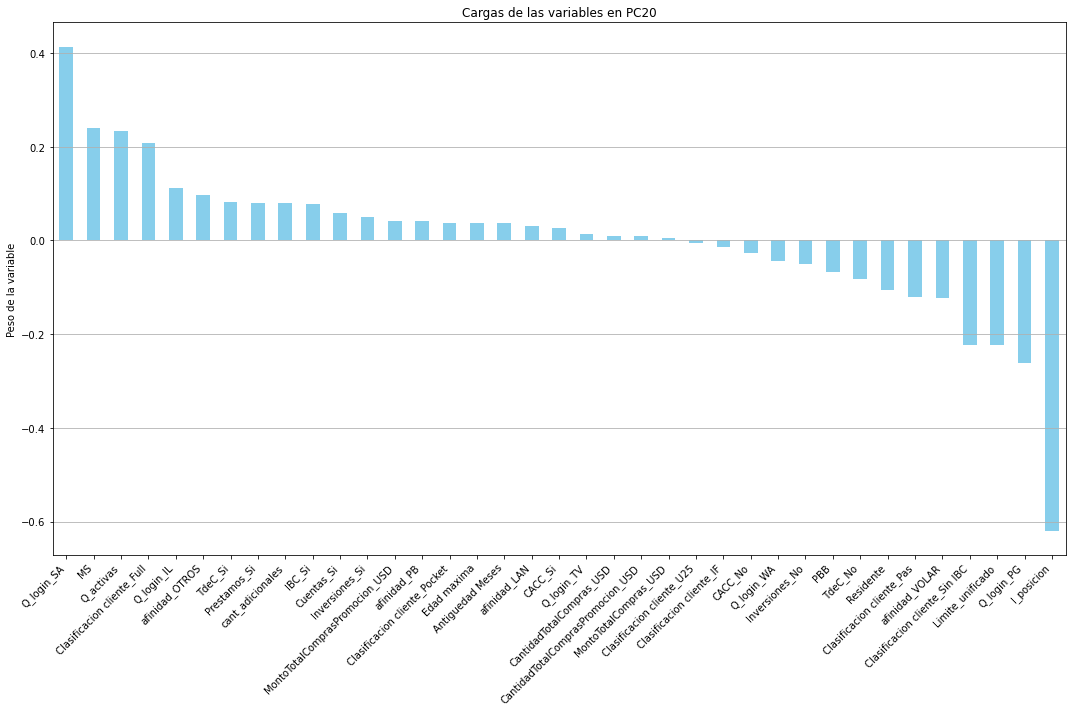

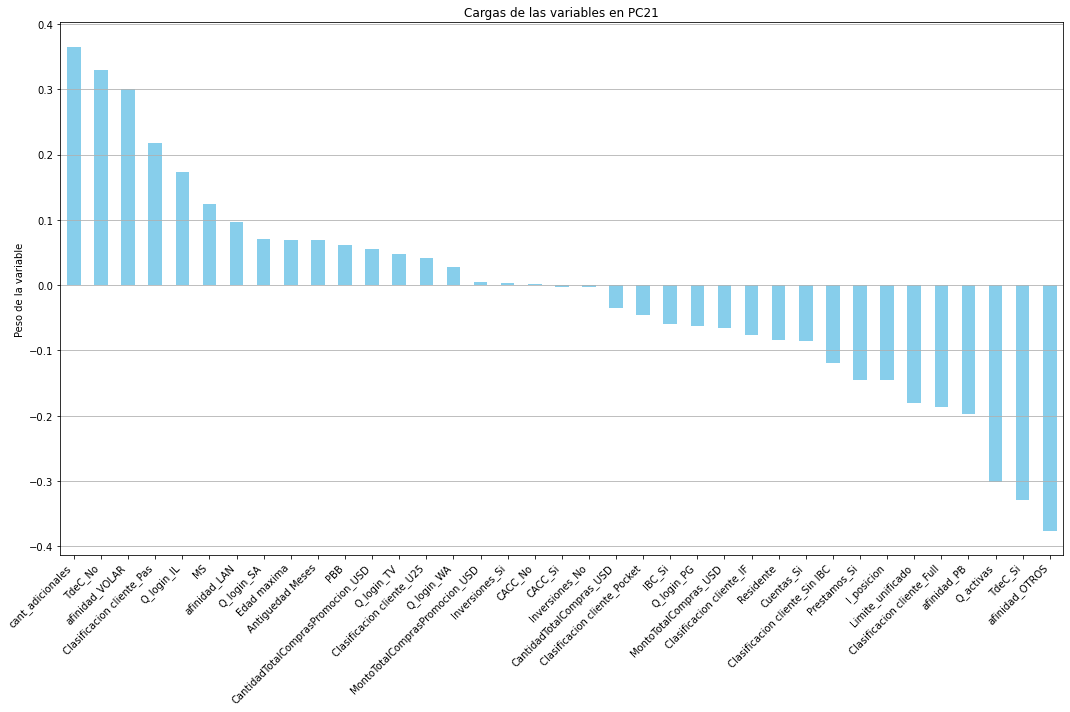

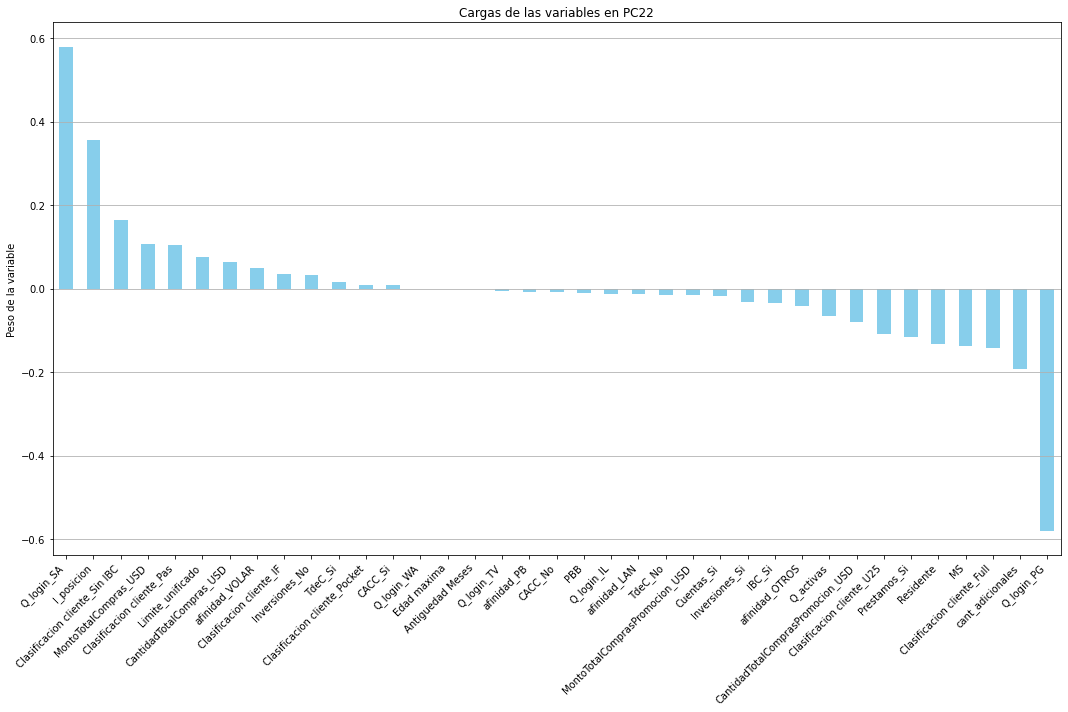

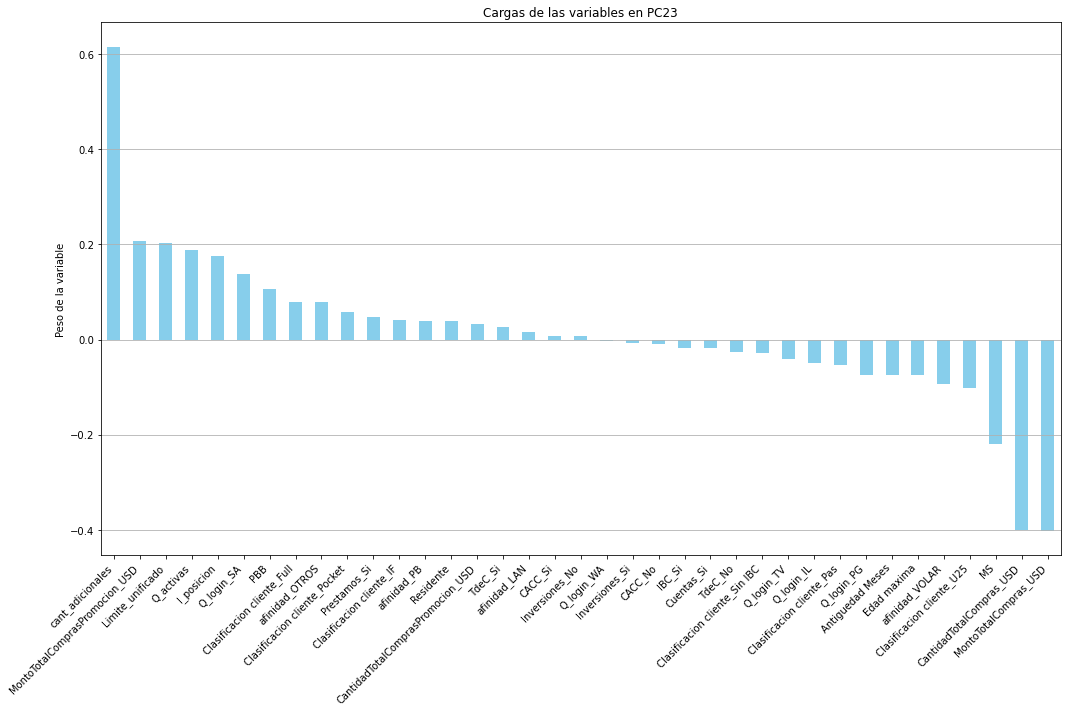

In [104]:
# Asumiendo que ya tenés el DataFrame 'cargas' (con las cargas de las variables originales)
# Tiene como columnas: PC1, PC2, PC3, etc.

# Crear un gráfico por cada componente
for componente in cargas.columns:
    plt.figure(figsize=(15, 10))
    cargas[componente].sort_values(ascending=False).plot(
        kind='bar', color='skyblue'
    )
    plt.title(f'Cargas de las variables en {componente}')
    plt.ylabel('Peso de la variable')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [105]:

filas = []


for componente in cargas.columns:
   
    top_vars = cargas[componente].abs().sort_values(ascending=False).head(3)

    for variable, carga in top_vars.items():
        filas.append({
            "Componente": componente,
            "Variable": variable,
            "Carga Absoluta": round(carga, 3)
        })


resumen_principales_cargas = pd.DataFrame(filas)

resumen_principales_cargas


,Componente,Variable,Carga Absoluta
0,PC1,CantidadTotalCompras_USD,0.320
1,PC1,MontoTotalCompras_USD,0.319
2,PC1,TdeC_No,0.296
3,PC2,Clasificacion cliente_Full,0.313
4,PC2,Q_activas,0.310
...,...,...,...
64,PC22,Q_login_SA,0.580
65,PC22,l_posicion,0.357
66,PC23,cant_adicionales,0.616
67,PC23,MontoTotalCompras_USD,0.402


In [106]:
#resumen_principales_cargas.to_excel('resumen_principales_cargas.xlsx')